In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 상관관계
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 데이터를 불러온다.

In [2]:
df1 = pd.read_csv('data/space_titanic_train.csv')
df2 = pd.read_csv('data/space_titanic_test.csv')

In [3]:
total_df = pd.concat([df1, df2])
total_df.reset_index(inplace=True, drop=True)

### 데이터 프레임 정보 확인

In [4]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


- 12970 entries : 행이 12970개
- object 컬럼이 존재

In [5]:
# 결측치 확인
total_df.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [6]:
# 학습 데이터 결측치 확인
df1.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
# 예측 데이터에 대한 결측치
df2.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

### 데이터 분석

#### PassengerId
- 승객 번호. 의미없음.
- 제거 대상

#### HomePlanet
- 우주선이 출발하는 행성이름

In [8]:
total_df['HomePlanet'].value_counts()

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

Earth, Europa, Mars로 구성되어 있다.

In [9]:
# 결측치 확인
total_df['HomePlanet'].isna().sum()

288

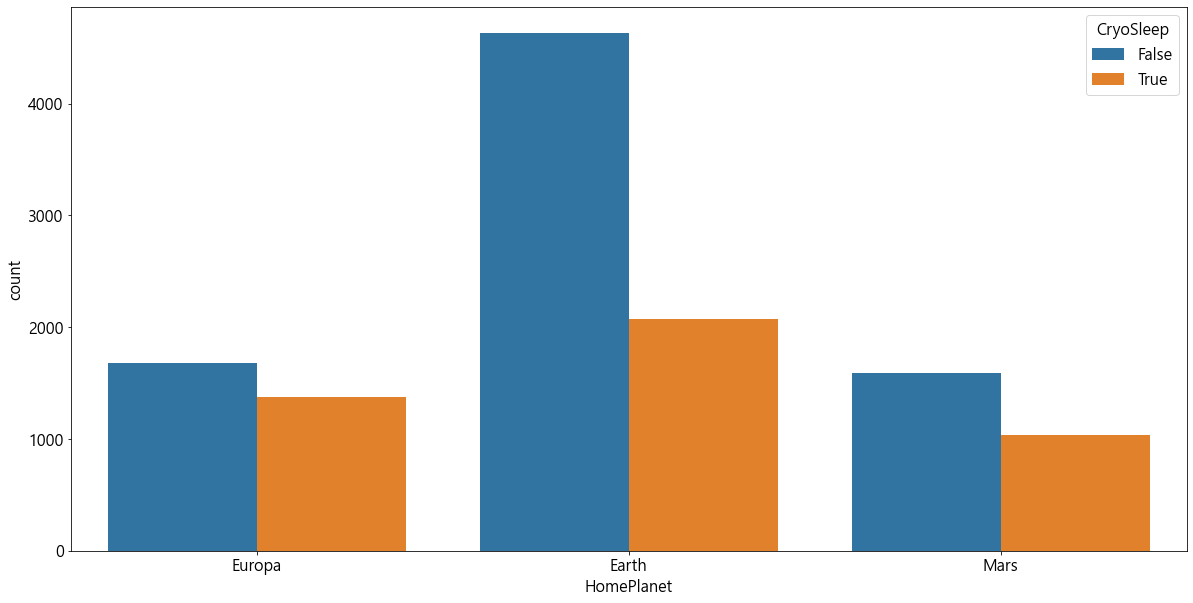

In [10]:
# HomePlanet, CryoSleep 간의 관계 확인
sns.countplot(data=total_df, x='HomePlanet', hue='CryoSleep')
plt.show()

In [11]:
# Cabin 분석을 위해 데이터를 나눈다.(Deck 추출)
a1 = total_df['Cabin'].str[:1]
total_df['Deck'] = a1
total_df['Deck'].value_counts()

F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: Deck, dtype: int64

In [12]:
# Cabin 분석을 위해 데이터를 나눈다.(CabinSide 추출)
a1 = total_df['Cabin'].str[-1]
total_df['CabinSide'] = a1
total_df['CabinSide'].value_counts()

S    6381
P    6290
Name: CabinSide, dtype: int64

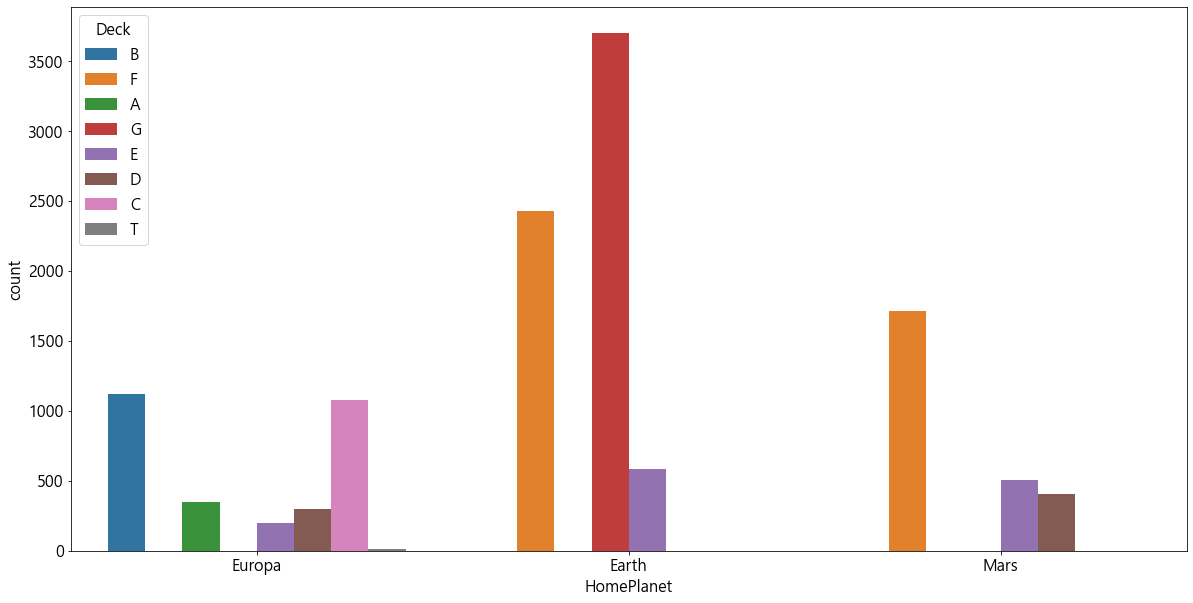

In [13]:
# HomePlanet, Deck 간의 관계 확인
sns.countplot(data=total_df, x='HomePlanet', hue='Deck')
plt.show()

- B, A, C, T Deck는 Europa만 존재하고, G Deck는 Earth에만 존재한다.

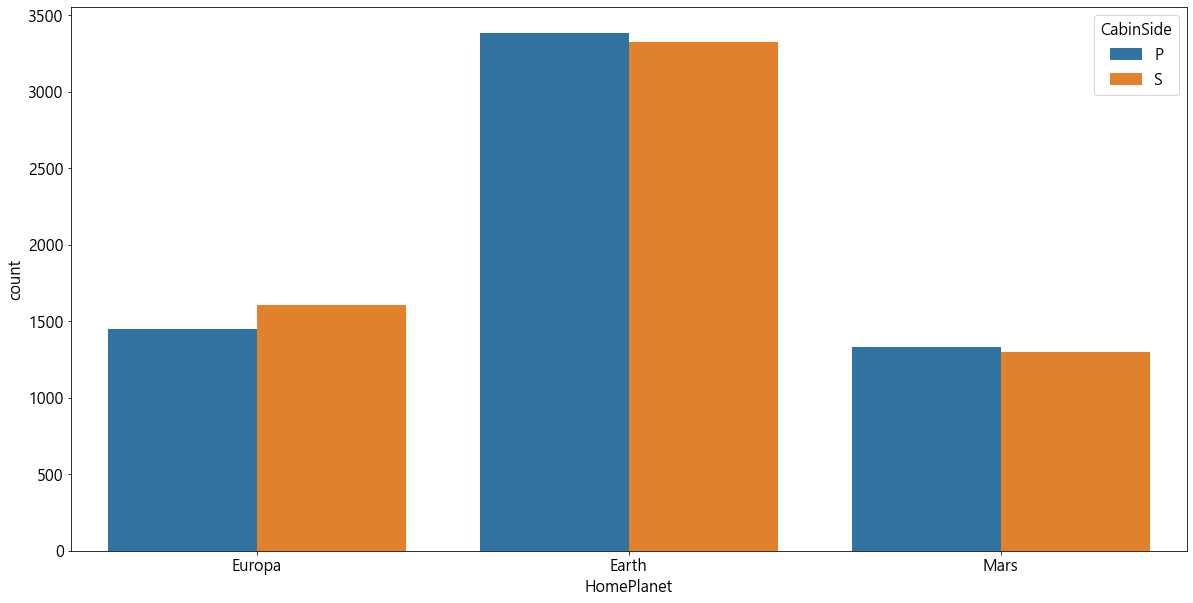

In [14]:
# HomePlanet, CabinSide 간의 관계 확인
sns.countplot(data=total_df, x='HomePlanet', hue='CabinSide')
plt.show()

- CabinSide는 출발지에 관계없이 모두 비슷하다.

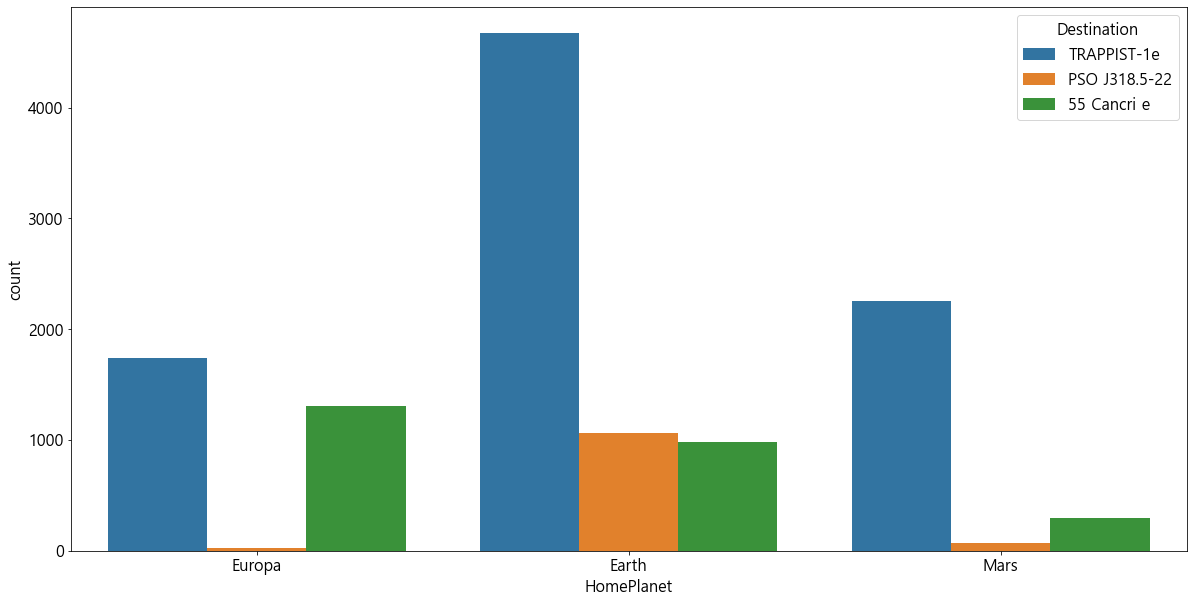

In [15]:
# HomePlanet, Destination 간의 관계 확인
sns.countplot(data=total_df, x='HomePlanet', hue='Destination')
plt.show()

- PSO J318.5-22 행성에 도착하는 사람들은 Earth에 출발하는 사람들이 대부분이다.

In [16]:
# Age(나이)의 종류가 80가지나 되므로 연령대(Age2)를 구한다.
total_df['Age2'] = total_df['Age'] // 10 * 10
total_df['Age2'].value_counts()

20.0    4190
30.0    2538
10.0    2235
40.0    1570
0.0      980
50.0     809
60.0     312
70.0      66
Name: Age2, dtype: int64

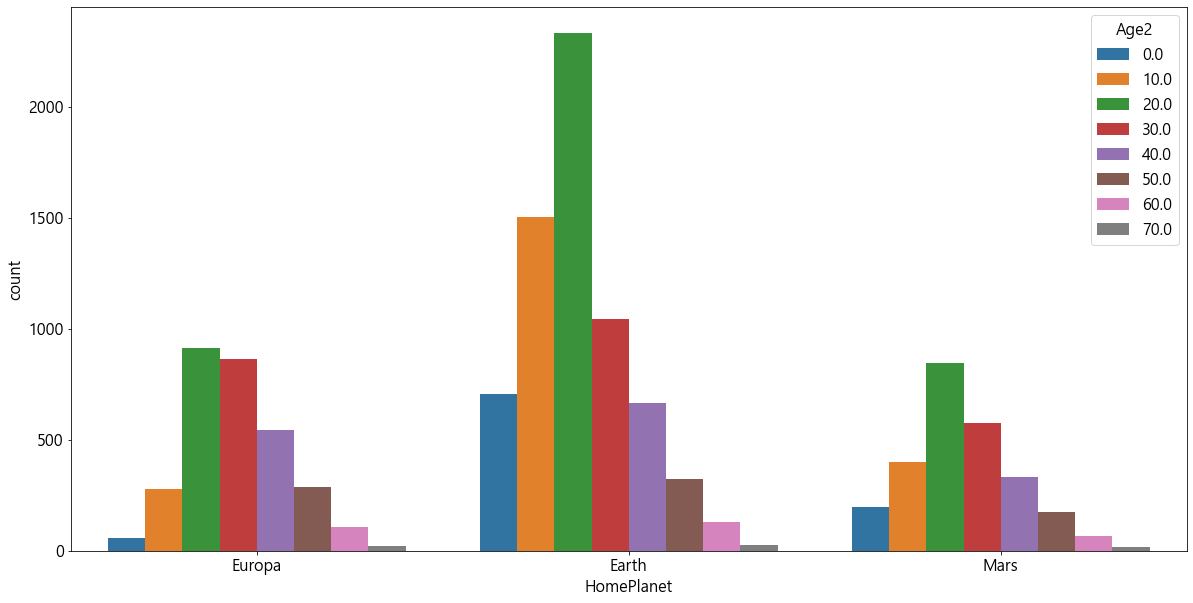

In [17]:
# HomePlanet, Age2 간의 관계 확인
sns.countplot(data=total_df, x='HomePlanet', hue='Age2')
plt.show()

- 연령대는 HomePlanet과 관계없이 고루 분포되어 있다.

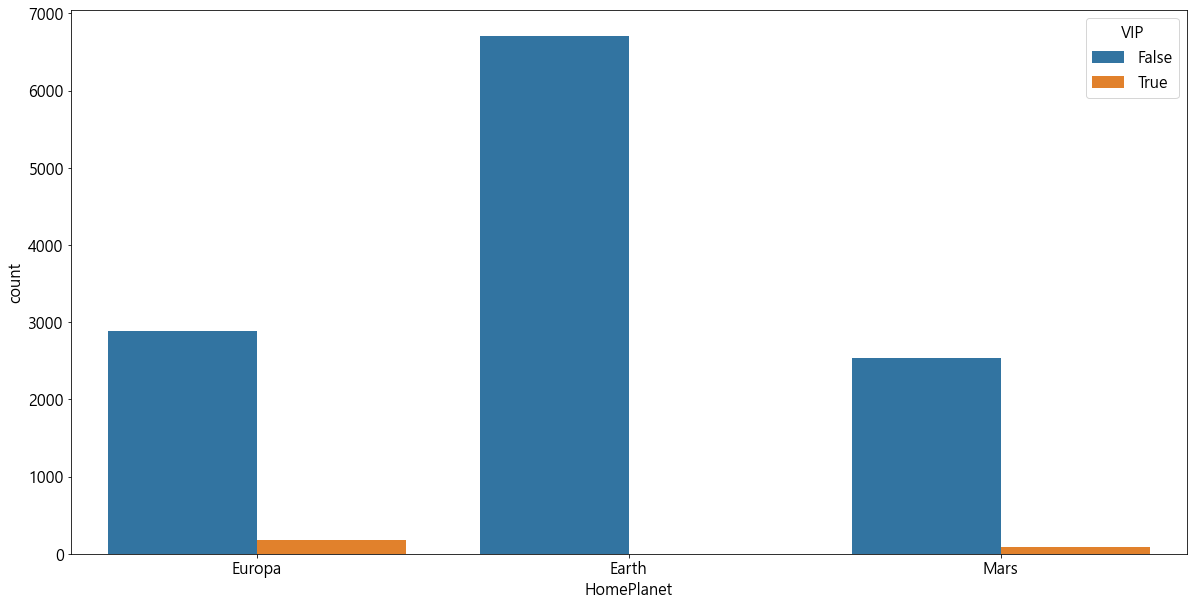

In [18]:
# HomePlanet, VIP 간의 관계 확인
sns.countplot(data=total_df, x='HomePlanet', hue='VIP')
plt.show()

- Earth에는 VIP가 단 한명도 존재하지 않는다(False).
- 하지만 다른 곳에도 VIP가 아닌 사람들이 존재한다.
- Europa와 Mars에 VIP가 존재한다(True)

In [19]:
# RoomService를 받은 사람과 그렇지 않은 사람을 구분해 데이터를 담는다.
a1 = total_df.query('RoomService == 0').index
a2 = total_df.query('RoomService > 0').index

total_df.loc[a1, 'RoomService2'] = 0
total_df.loc[a2, 'RoomService2'] = 1

total_df['RoomService2'].value_counts()

0.0    8303
1.0    4404
Name: RoomService2, dtype: int64

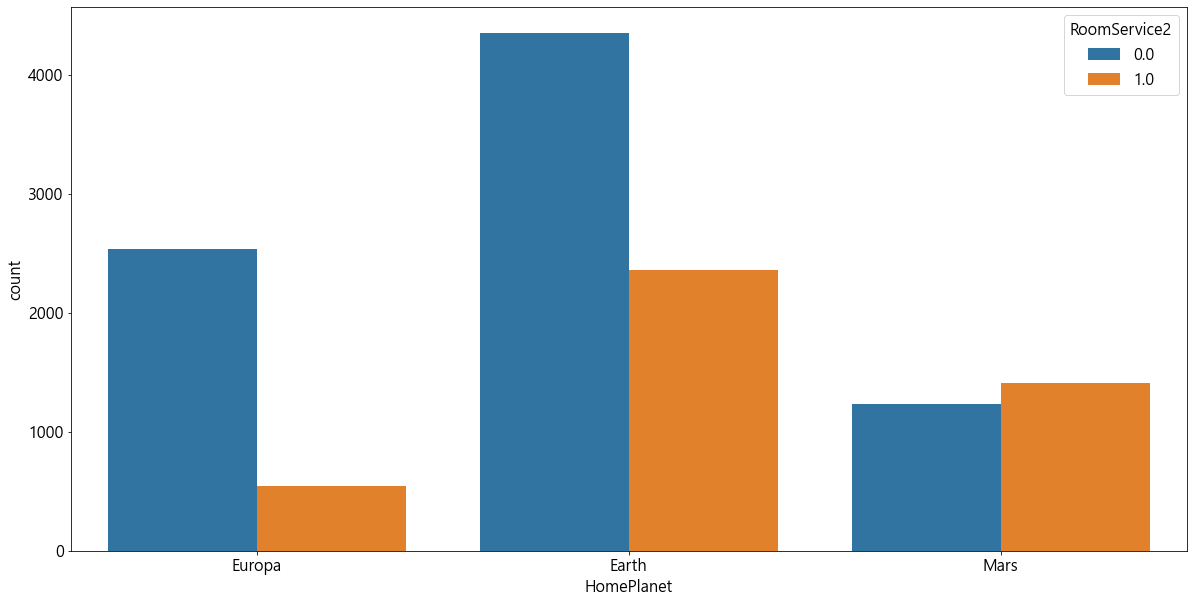

In [20]:
# HomePlanet, RoomService2 간의 관계 확인
sns.countplot(data=total_df, x='HomePlanet', hue='RoomService2')
plt.show()

- Europa, Earth 인 경우 룸서비스를 받지 않은 사람이 많고, Mars인 경우 룸서비스를 받은 사람이 많다

In [21]:
# FoodCourt를 받은 사람과 그렇지 않은 사람을 구분해 데이터를 담는다.
a1 = total_df.query('FoodCourt == 0').index
a2 = total_df.query('FoodCourt > 0').index

total_df.loc[a1, 'FoodCourt2'] = 0
total_df.loc[a2, 'FoodCourt2'] = 1

total_df['FoodCourt2'].value_counts()

0.0    8146
1.0    4535
Name: FoodCourt2, dtype: int64

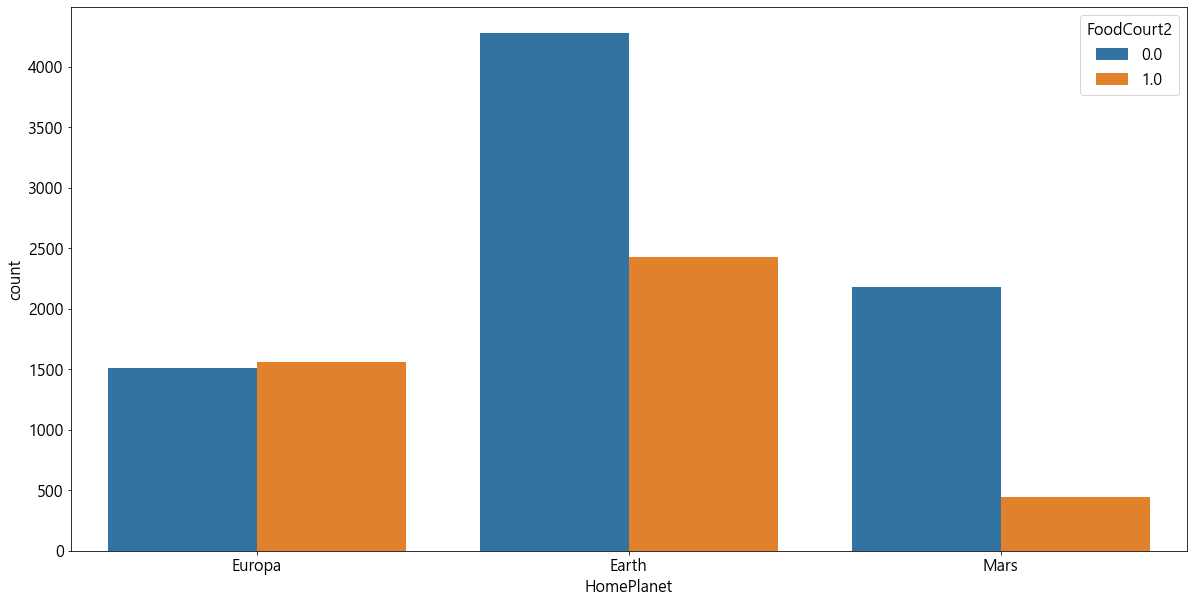

In [22]:
# HomePlanet, FoodCourt2 간의 관계 확인
sns.countplot(data=total_df, x='HomePlanet', hue='FoodCourt2')
plt.show()

- Europa는 FoodCourt를 이용한 사람이 많고 Mars, Earth는 FoodCourt를 이용하는 사람이 적다.

In [23]:
# ShoppingMall를 받은 사람과 그렇지 않은 사람을 구분해 데이터를 담는다.
a1 = total_df.query('ShoppingMall == 0').index
a2 = total_df.query('ShoppingMall > 0').index

total_df.loc[a1, 'ShoppingMall2'] = 0
total_df.loc[a2, 'ShoppingMall2'] = 1

total_df['ShoppingMall2'].value_counts()

0.0    8331
1.0    4333
Name: ShoppingMall2, dtype: int64

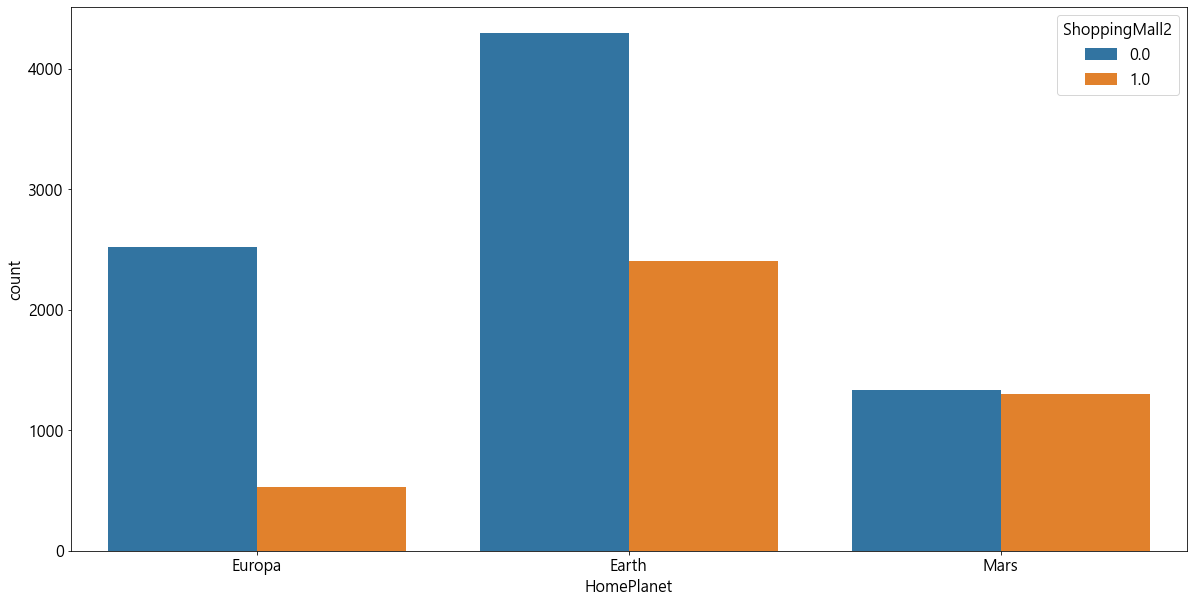

In [24]:
# HomePlanet, ShoppingMall2 간의 관계 확인
sns.countplot(data=total_df, x='HomePlanet', hue='ShoppingMall2')
plt.show()

- Europa, Earth의 경우 쇼핑몰을 이용하지 않은 사람이 많고 Mars는 쇼핑몰을 이용한 사람들이 많다.

In [25]:
# Spa를 받은 사람과 그렇지 않은 사람을 구분해 데이터를 담는다.
a1 = total_df.query('Spa == 0').index
a2 = total_df.query('Spa > 0').index

total_df.loc[a1, 'Spa2'] = 0
total_df.loc[a2, 'Spa2'] = 1

total_df['Spa2'].value_counts()

0.0    7935
1.0    4751
Name: Spa2, dtype: int64

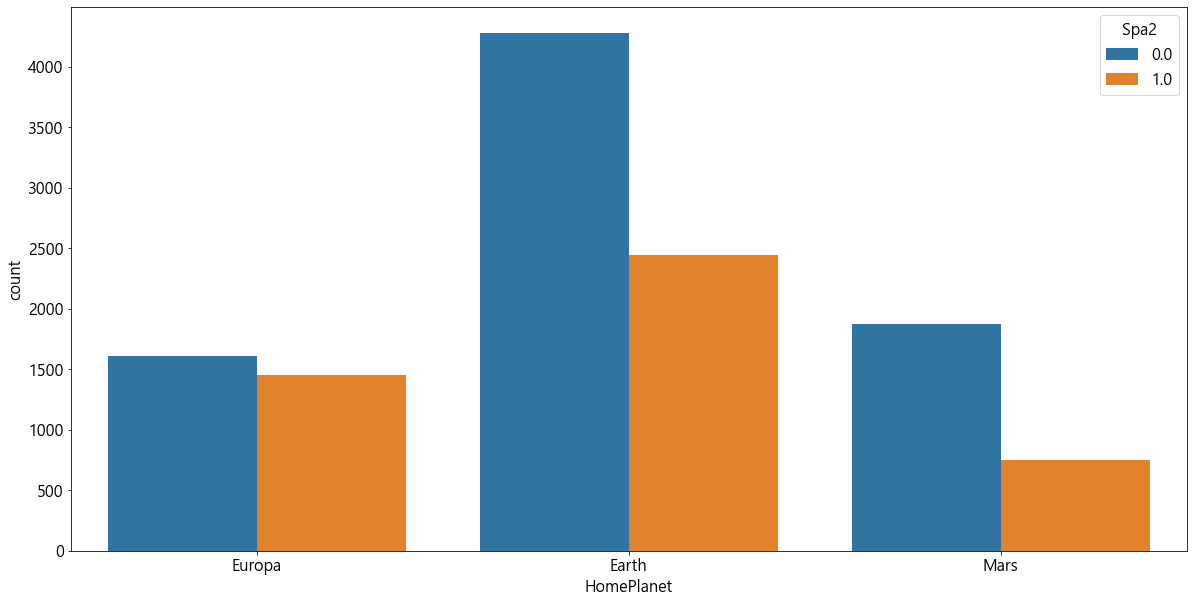

In [26]:
# HomePlanet, Spa2 간의 관계 확인
sns.countplot(data=total_df, x='HomePlanet', hue='Spa2')
plt.show()

- Europa는 이용객이 더 많고 Mars,  Earth는 이용하지 않은 사람이 더 많다

In [27]:
# VRDeck를 받은 사람과 그렇지 않은 사람을 구분해 데이터를 담는다.
a1 = total_df.query('VRDeck == 0').index
a2 = total_df.query('VRDeck > 0').index

total_df.loc[a1, 'VRDeck2'] = 0
total_df.loc[a2, 'VRDeck2'] = 1

total_df['VRDeck2'].value_counts()

0.0    8252
1.0    4450
Name: VRDeck2, dtype: int64

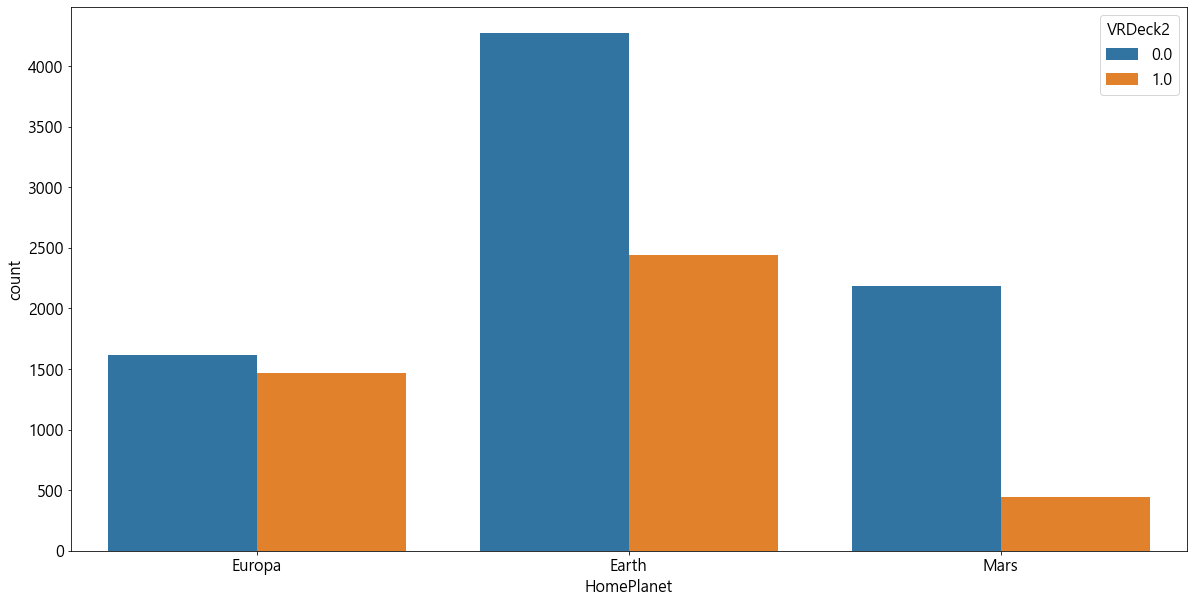

In [28]:
# HomePlanet, VRDeck2 간의 관계 확인
sns.countplot(data=total_df, x='HomePlanet', hue='VRDeck2')
plt.show()

- Europa는 이용객이 많고, Mars, Earth는 이용객이 적다.

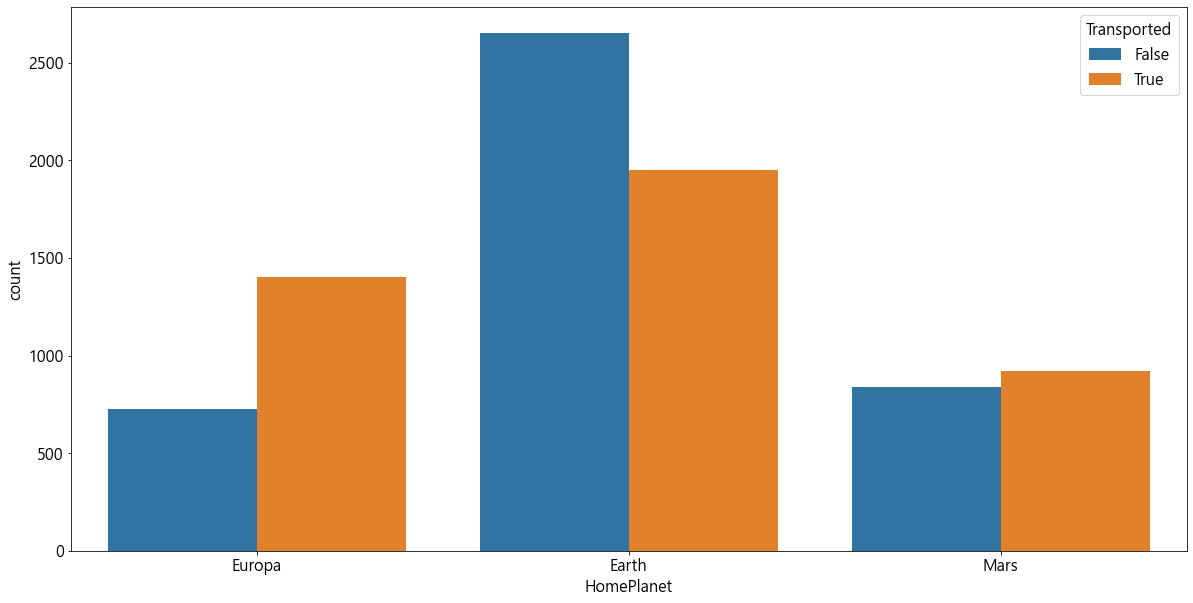

In [29]:
# HomePlanet, Transported 간의 관계 확인
sns.countplot(data=total_df, x='HomePlanet', hue='Transported')
plt.show()

- Europa, Mars는 도착확률이 높고 Earth는 도착확률이 낮다
- 하지만 이 데이터를 결과 데이터이기 때문에 예측할 데이터쪽에는 존재하지 않는 데이터이다.
- 따라서 이걸 이용하겠다면 학습 데이터에만 이용할 수 있기 때문에 이 데이터는 결측치 유추 과정에서 제외한다.

In [30]:
# Deck를 통한 결측치 처리
# B, A, C, T Deck는 Europa만 존재하고, G Deck는 Earth에만 존재한다.

# Deck가 B, A, C, T인 데이터를 가져온다.
list1 = ['B', 'A', 'C', 'T']
a1 = total_df.query('Deck in @list1')
# 이사람들에 대해 HomePlanet이 결측치인 데이터를 가져온다.
a2 = a1[a1['HomePlanet'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'HomePlanet'] = 'Europa'

# Deck가 G인 데이터를 가져온다.
a1 = total_df.query('Deck == "G"')
# 이사람들에 대해 HomePlanet이 결측치인 데이터를 가져온다.
a2 = a1[a1['HomePlanet'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'HomePlanet'] = 'Earth'

total_df['HomePlanet'].isna().sum()

160

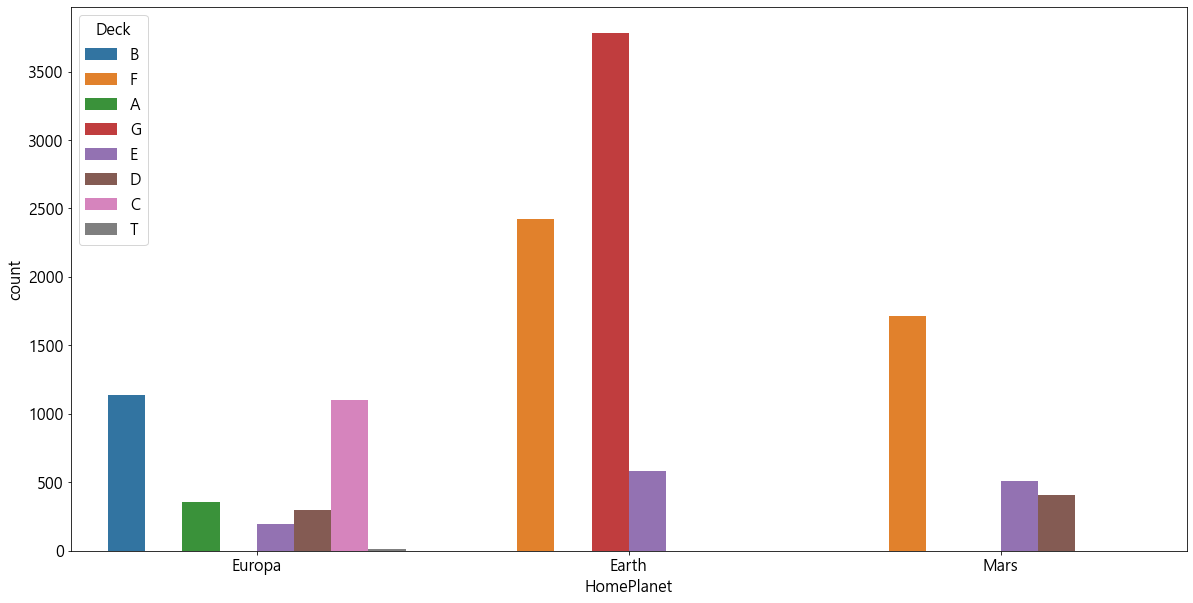

In [31]:
# HomePlanet, Deck 간의 관계 확인
sns.countplot(data=total_df, x='HomePlanet', hue='Deck')
plt.show()

In [32]:
# Destination이 PSO J318.5-22 인 사람들을 가져온다.
a1 = total_df.query('Destination == "PSO J318.5-22"')
# 이사람들에 대해 HomePlanet이 결측치인 데이터를 가져온다.
a2 = a1[a1['HomePlanet'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'HomePlanet'] = 'Earth'

total_df['HomePlanet'].isna().sum()

150

In [33]:
# VIP인 사람들 중에 HomePlanet이 결측치인 사람들의 수를 파악한다.
a1 = total_df.query('VIP == True')
a2 = a1[a1['HomePlanet'].isna()]
len(a2)

6

In [34]:
# 얼마 안되니깐 화성으로 보내버립시다..
total_df.loc[a2.index, 'HomePlanet'] = 'Mars'
total_df['HomePlanet'].isna().sum()

144

In [35]:
# HomePlanet이 결측치인 사람들의 정보를 가져온다.
a1 = total_df[total_df['HomePlanet'].isna()]
a1['Transported'].isna().sum()

46

In [36]:
total_df['HomePlanet'].value_counts()

Earth     6956
Europa    3180
Mars      2690
Name: HomePlanet, dtype: int64

In [37]:
# 남은 결측치의 수가 많지 않기 때문에 남은 것들은 Earth로 채워준다.
a1 = total_df[total_df['HomePlanet'].isna()].index
total_df.loc[a1, 'HomePlanet'] = 'Earth'
total_df['HomePlanet'].isna().sum()

0

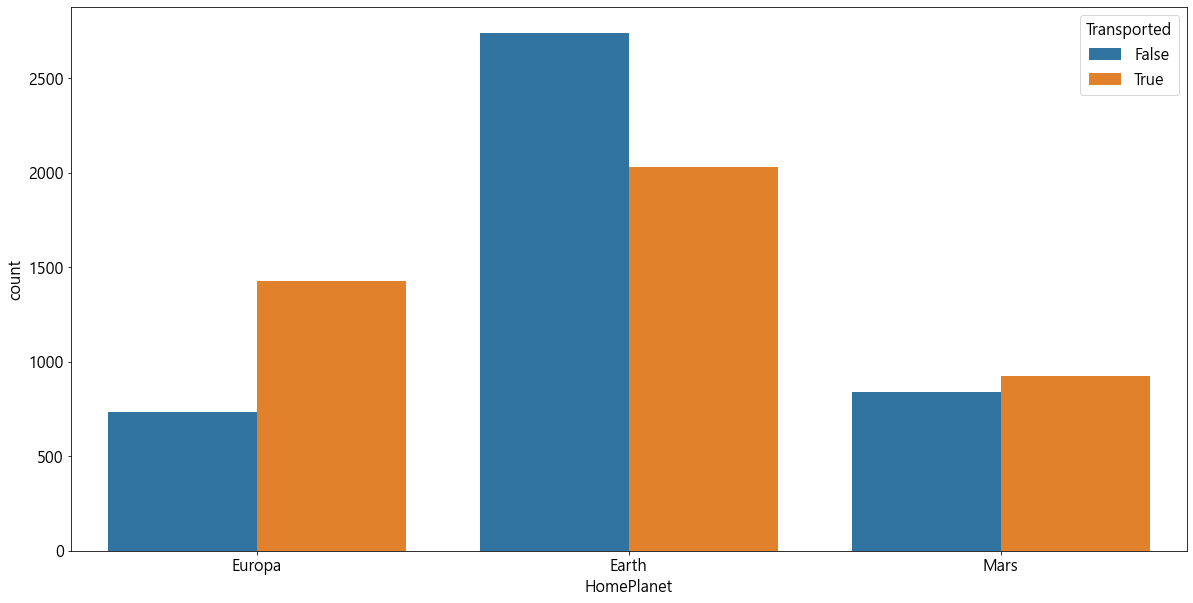

In [38]:
# HomePlanet과 Transported간의 관계
sns.countplot(data=total_df, x='HomePlanet', hue='Transported')
plt.show()

- Europa는 도착했을 확률이 높다
- Earth는 독착하지 못했을 확률이 높다.
- Mars는 비슷하다

#### CryoSleep
- 동면 여부

In [39]:
# 결측치 확인
total_df['CryoSleep'].isna().sum()

310

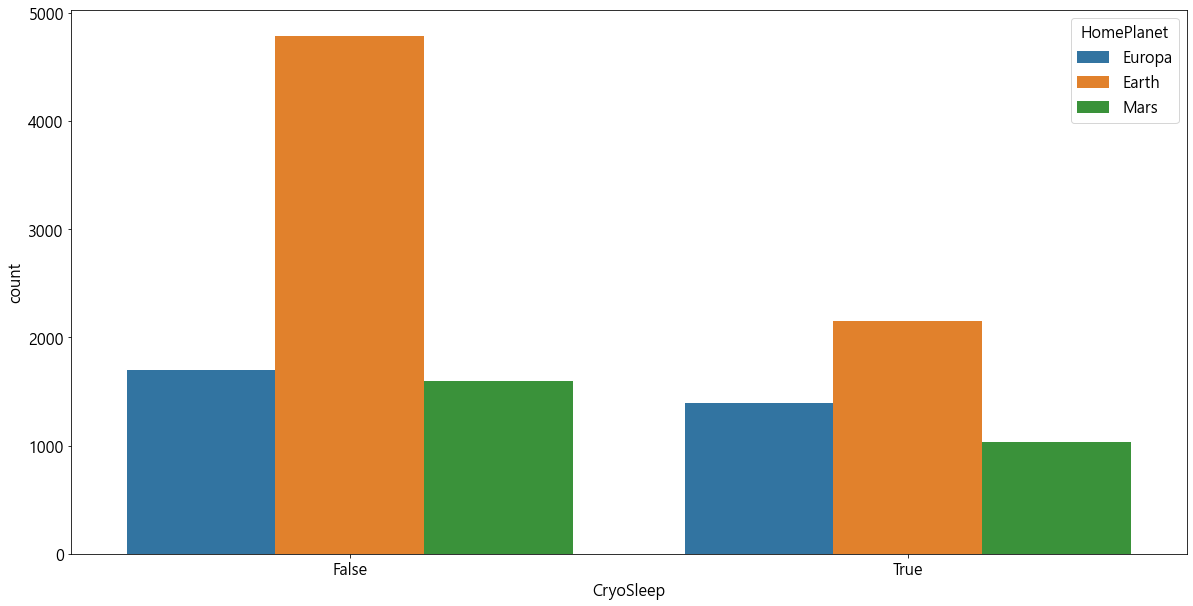

In [40]:
# CryoSleep과 HomePlanet간의 관계
sns.countplot(data=total_df, x='CryoSleep', hue='HomePlanet')
plt.show()

- Europa와 Mars는 비슷하지만 Earth는 False인 사람들이 훨씬 많다.

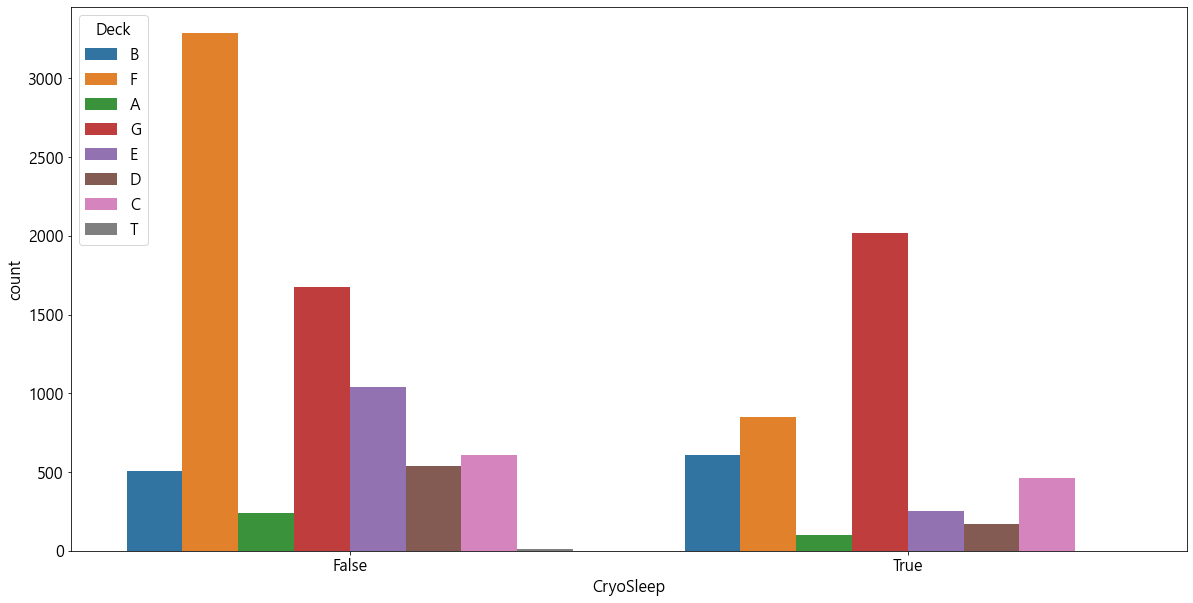

In [41]:
# CryoSleep과 Deck간의 관계
sns.countplot(data=total_df, x='CryoSleep', hue='Deck')
plt.show()

- F, E, D 데크인 사람들인 False의 수가 더 많고 나머지는 비슷하다.

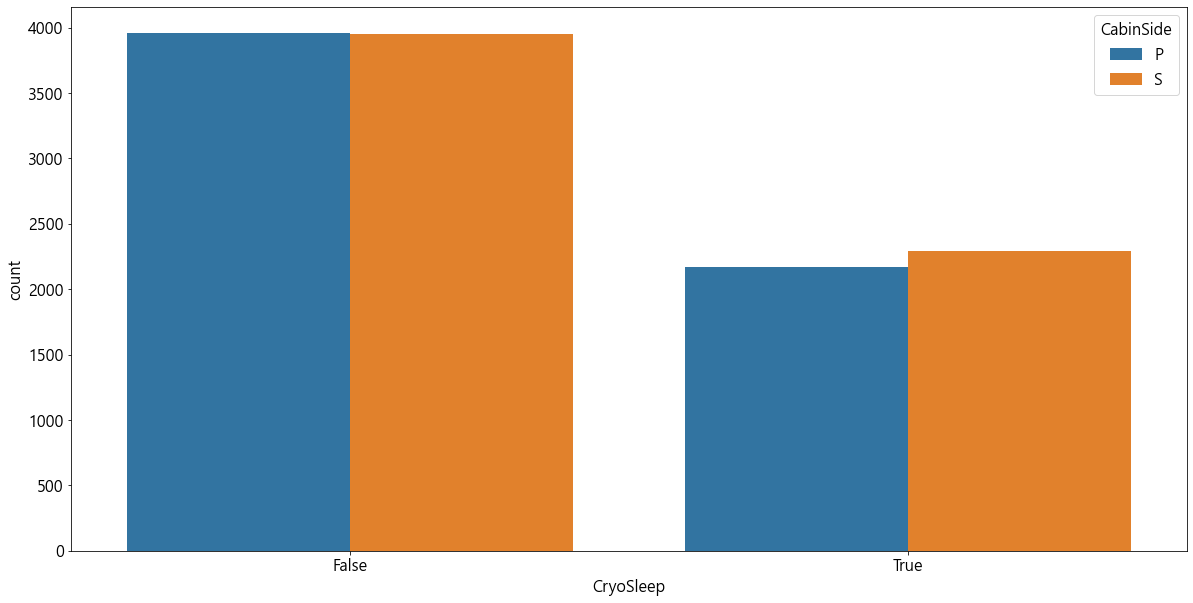

In [42]:
# CryoSleep과 CabinSide간의 관계
sns.countplot(data=total_df, x='CryoSleep', hue='CabinSide')
plt.show()

- CabinSide는 모두 비슷하다.

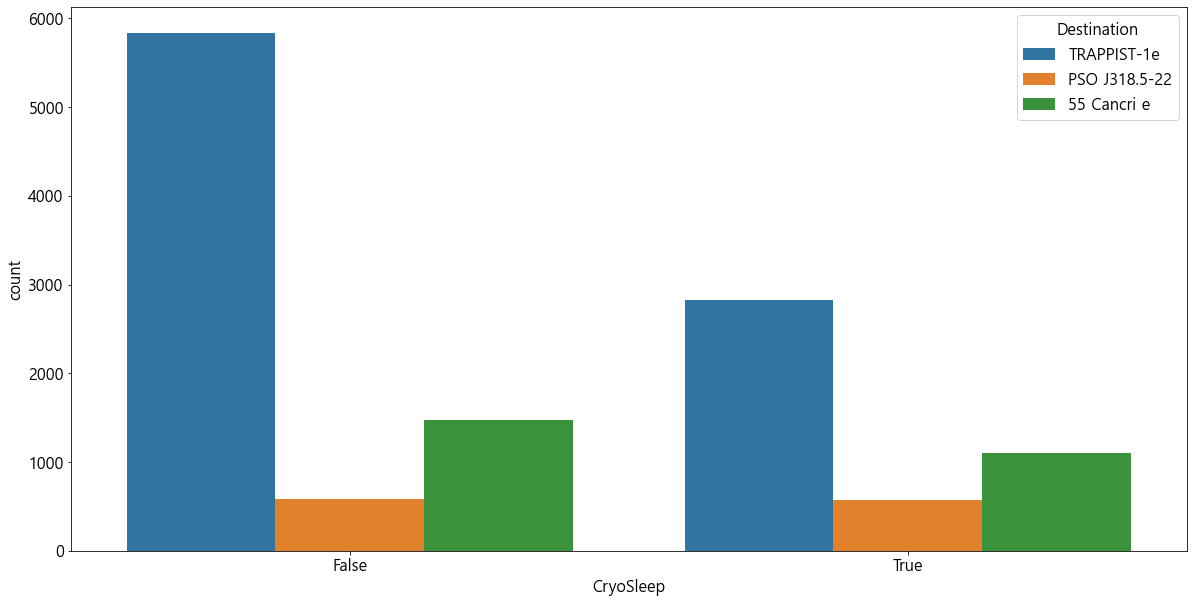

In [43]:
# CryoSleep과 Destination간의 관계
sns.countplot(data=total_df, x='CryoSleep', hue='Destination')
plt.show()

- TRAPPIST-1e 행성에 도착하는 사람들은 False인 사람들이 많고 나머지는 비슷하다.

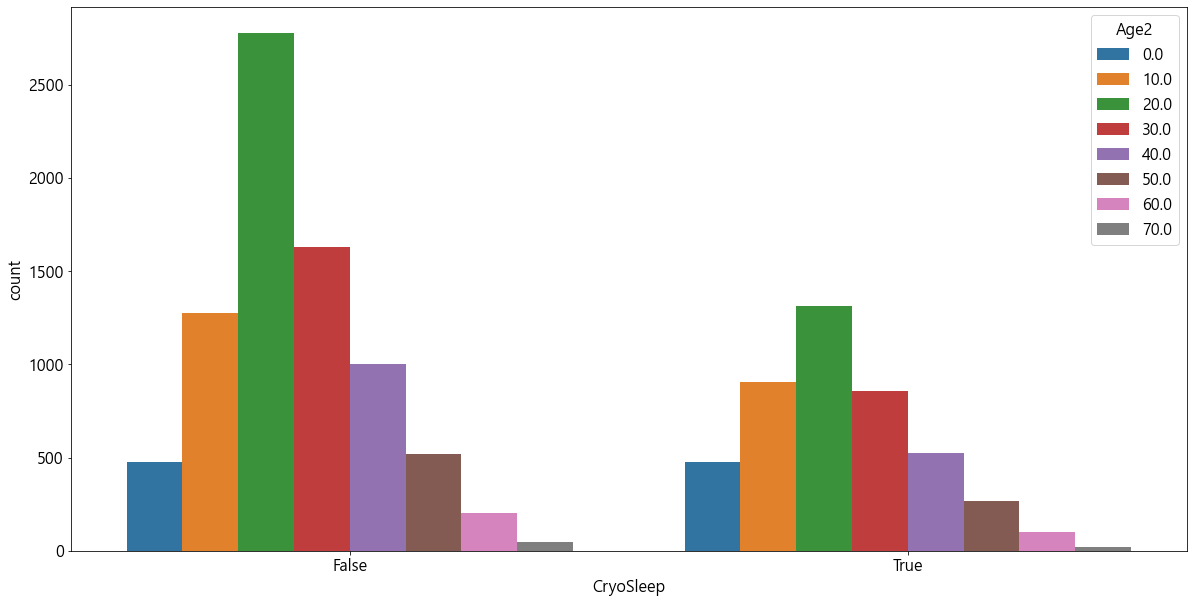

In [44]:
# CryoSleep과 Age2간의 관계
sns.countplot(data=total_df, x='CryoSleep', hue='Age2')
plt.show()

- 0살대는 거의 비슷하다.
- 10, 20, 30, 40, 50대는 False인 사람들이 더 많다.
- 60대 이상은 차이가 조금 나긴 하지만 비슷하다.

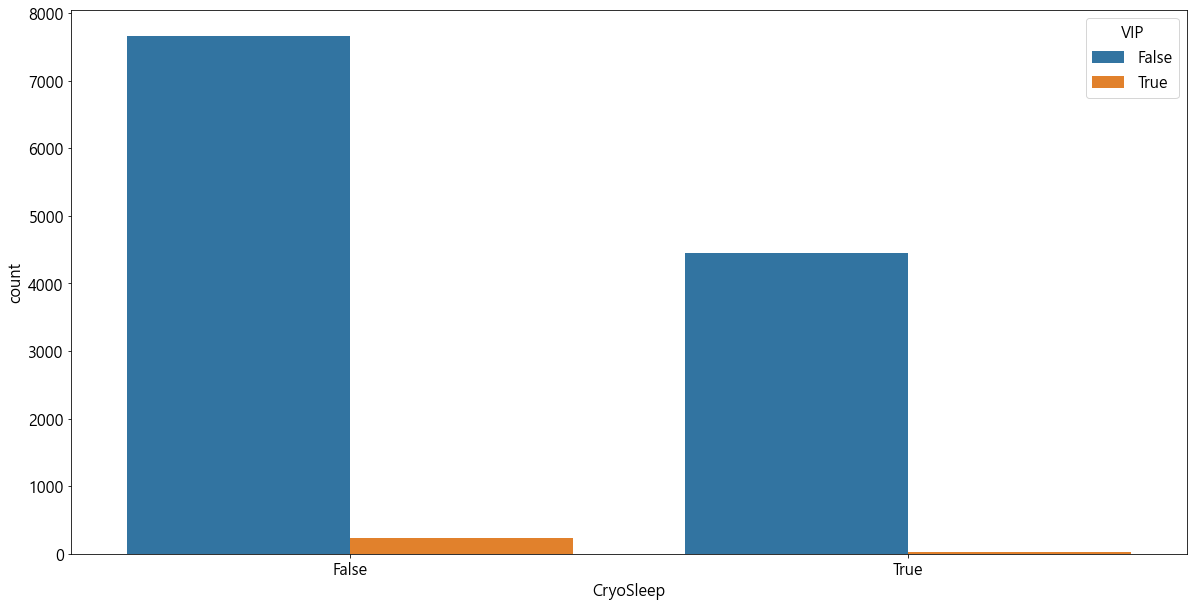

In [45]:
# CryoSleep과 VIP간의 관계
sns.countplot(data=total_df, x='CryoSleep', hue='VIP')
plt.show()

- VIP여부를 떠나 False와 True의 비율이 비슷하다.

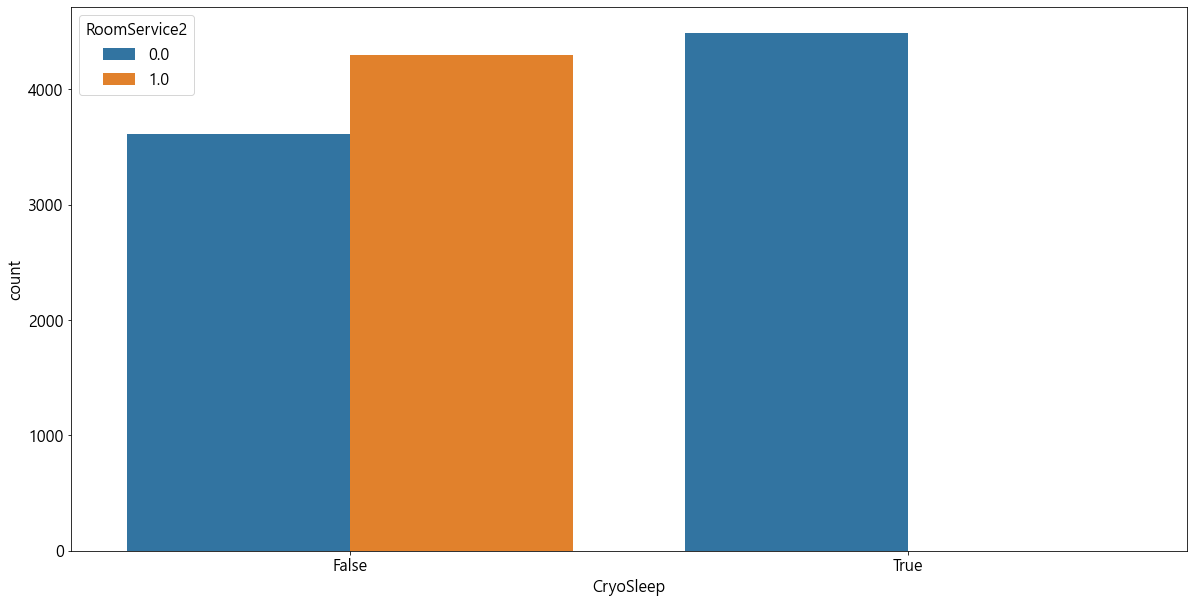

In [46]:
# CryoSleep과 RoomService2간의 관계
sns.countplot(data=total_df, x='CryoSleep', hue='RoomService2')
plt.show()

- 룸서비스를 한번이라도 받은 사람들은 모두 False 값을 갖는다.

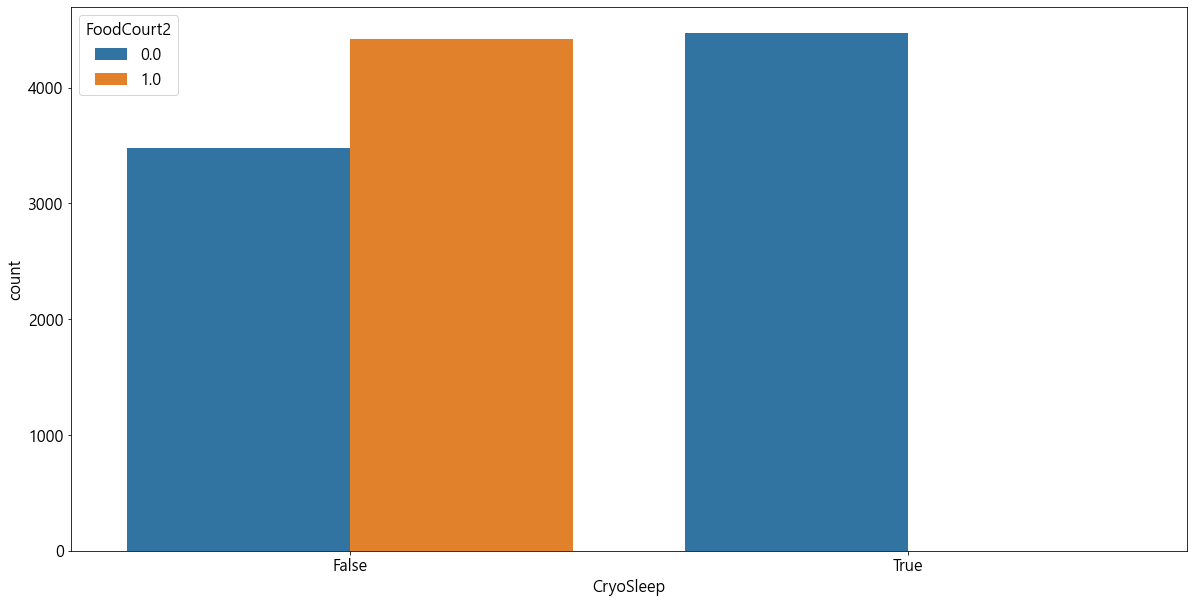

In [47]:
# CryoSleep과 FoodCourt2간의 관계
sns.countplot(data=total_df, x='CryoSleep', hue='FoodCourt2')
plt.show()

- FoodCourt를 한번이라도 이용한 사람들은 False에 해당한다.

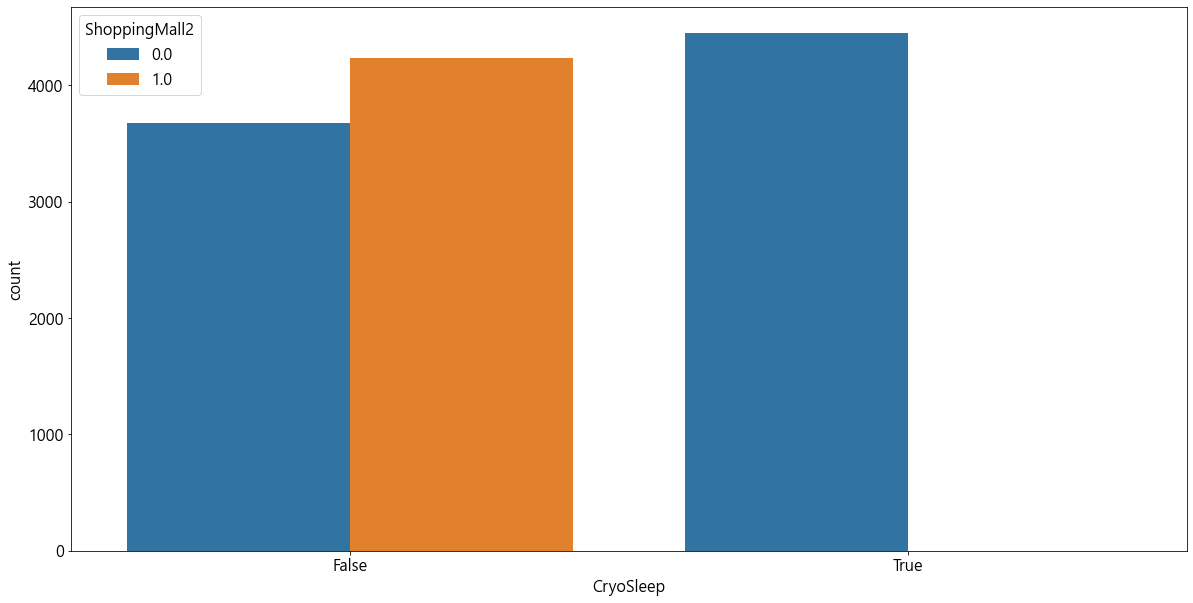

In [48]:
# CryoSleep과 ShoppingMall2간의 관계
sns.countplot(data=total_df, x='CryoSleep', hue='ShoppingMall2')
plt.show()

- 쇼핑몰을 한번이라도 이용한 사람들은 False에 해당한다.

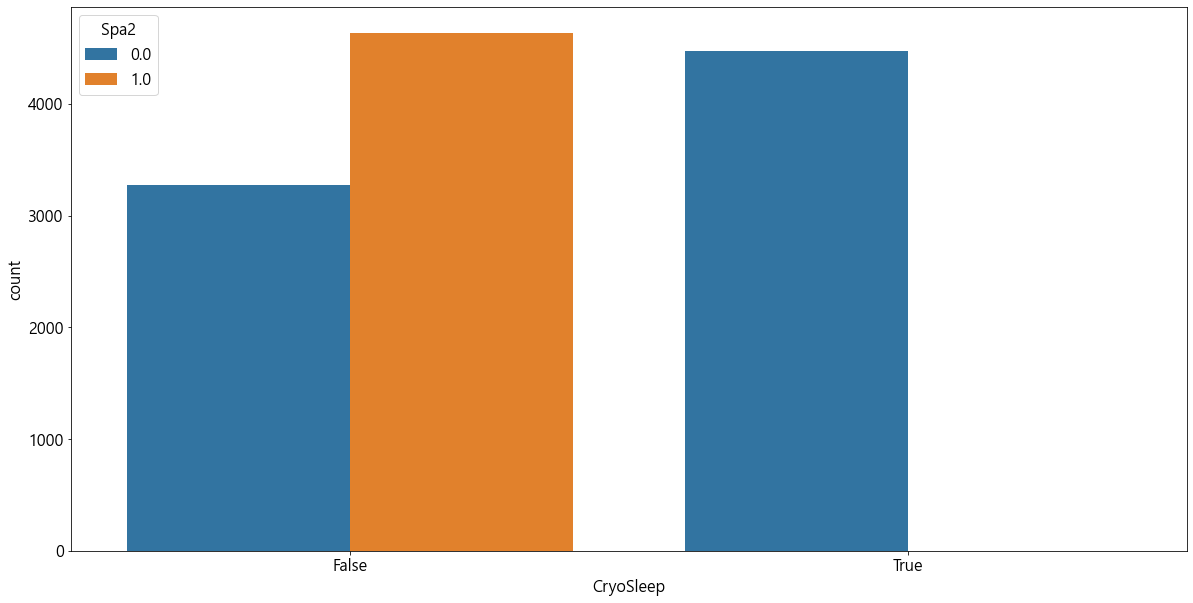

In [49]:
# CryoSleep과 Spa2간의 관계
sns.countplot(data=total_df, x='CryoSleep', hue='Spa2')
plt.show()

- 스파를 한번이라도 이용한 사람들은 모두 False에 해당한다.

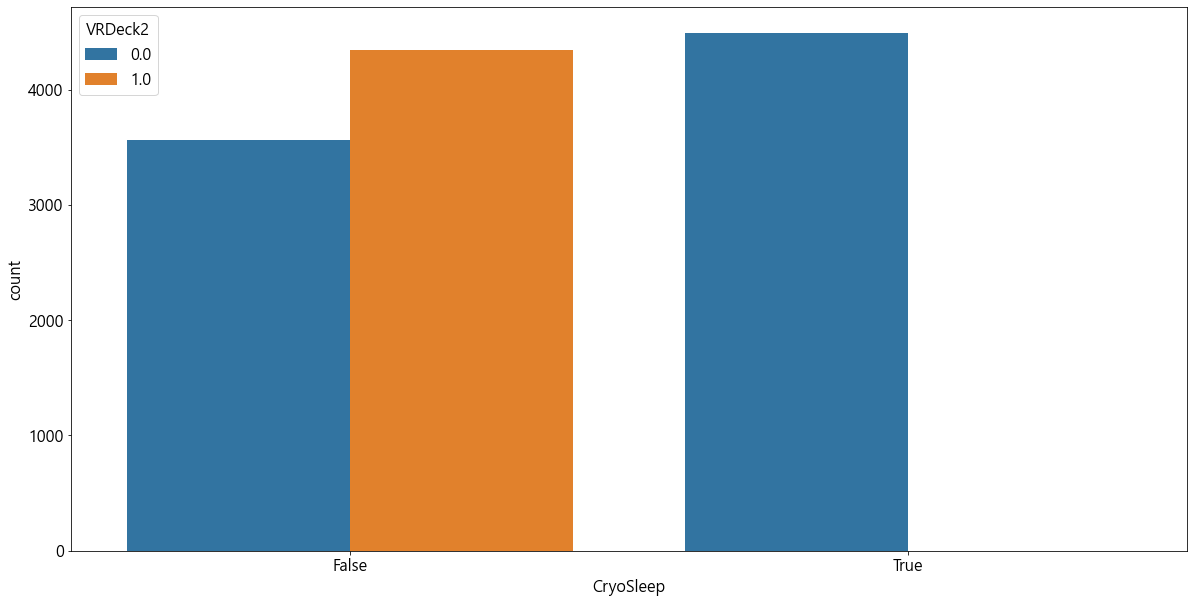

In [50]:
# CryoSleep과 VRDeck2간의 관계
sns.countplot(data=total_df, x='CryoSleep', hue='VRDeck2')
plt.show()

- VRDeck를 한번이라도 이용한 사람들은 모두 False에 해당한다.

In [51]:
# RoomService2 가 1인 사람들은 모두 False로 채워준다.
# RoomService2가 1인 사람들을 가져온다.
a1 = total_df.query('RoomService2 == 1')
# 이 사람들에 대해 CryoSleep이 결측치인 사람들을 가져온다.
a2 = a1[a1['CryoSleep'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'CryoSleep'] = False

total_df['CryoSleep'].isna().sum()

203

In [52]:
# FoodCourt2 가 1인 사람들은 모두 False로 채워준다.
# FoodCourt2가 1인 사람들을 가져온다.
a1 = total_df.query('FoodCourt2 == 1')
# 이 사람들에 대해 CryoSleep이 결측치인 사람들을 가져온다.
a2 = a1[a1['CryoSleep'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'CryoSleep'] = False

total_df['CryoSleep'].isna().sum()

152

In [53]:
# ShoppingMall2 가 1인 사람들은 모두 False로 채워준다.
# ShoppingMall2가 1인 사람들을 가져온다.
a1 = total_df.query('ShoppingMall2 == 1')
# 이 사람들에 대해 CryoSleep이 결측치인 사람들을 가져온다.
a2 = a1[a1['CryoSleep'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'CryoSleep'] = False

total_df['CryoSleep'].isna().sum()

142

In [54]:
# Spa2 가 1인 사람들은 모두 False로 채워준다.
# Spa2가 1인 사람들을 가져온다.
a1 = total_df.query('Spa2 == 1')
# 이 사람들에 대해 CryoSleep이 결측치인 사람들을 가져온다.
a2 = a1[a1['CryoSleep'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'CryoSleep'] = False

total_df['CryoSleep'].isna().sum()

137

In [55]:
# VRDeck2 가 1인 사람들은 모두 False로 채워준다.
# VRDeck2가 1인 사람들을 가져온다.
a1 = total_df.query('VRDeck2 == 1')
# 이 사람들에 대해 CryoSleep이 결측치인 사람들을 가져온다.
a2 = a1[a1['CryoSleep'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'CryoSleep'] = False

total_df['CryoSleep'].isna().sum()

136

In [56]:
# Deck가 F 인 사람들 모두를 False 로 채워준다.
# Deck가 F 인 사람들을 가져온다.
a1 = total_df.query('Deck == "F"')
# 이 사람들에 대해 CryoSleep이 결측치인 사람들을 가져온다.
a2 = a1[a1['CryoSleep'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'CryoSleep'] = False

total_df['CryoSleep'].isna().sum()

111

In [57]:
# HomePlanet 이 Earth 인 사람들 모두를 False 로 채워준다.
# HomePlanet 이 Earth 인 사람들을 가져온다.
a1 = total_df.query('HomePlanet == "Earth"')
# 이 사람들에 대해 CryoSleep이 결측치인 사람들을 가져온다.
a2 = a1[a1['CryoSleep'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'CryoSleep'] = False

total_df['CryoSleep'].isna().sum()

47

In [58]:
# Destination 이 TRAPPIST-1e 인 사람들 모두를 False 로 채워준다.
# Destination 이 TRAPPIST-1e 인 사람들을 가져온다.
a1 = total_df.query('Destination == "TRAPPIST-1e"')
# 이 사람들에 대해 CryoSleep이 결측치인 사람들을 가져온다.
a2 = a1[a1['CryoSleep'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'CryoSleep'] = False

total_df['CryoSleep'].isna().sum()

20

In [59]:
# Age2 이 20, 30, 40, 50 인 사람들 모두를 False 로 채워준다.
# Age2 이 20, 30, 40, 50 인 사람들을 가져온다.
a100 = [20, 30, 40, 50]
a1 = total_df.query('Age2 in @a100')
# 이 사람들에 대해 CryoSleep이 결측치인 사람들을 가져온다.
a2 = a1[a1['CryoSleep'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'CryoSleep'] = False

total_df['CryoSleep'].isna().sum()

4

In [60]:
# CryoSleep 분포를 확인한다.
total_df['CryoSleep'].value_counts()

False    8385
True     4581
Name: CryoSleep, dtype: int64

In [61]:
# False가 더 많기 때문에 나머지는 False로 채워준다.
# 이 사람들에 대해 CryoSleep이 결측치인 사람들을 가져온다.
a2 = total_df[total_df['CryoSleep'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'CryoSleep'] = False

total_df['CryoSleep'].isna().sum()

0

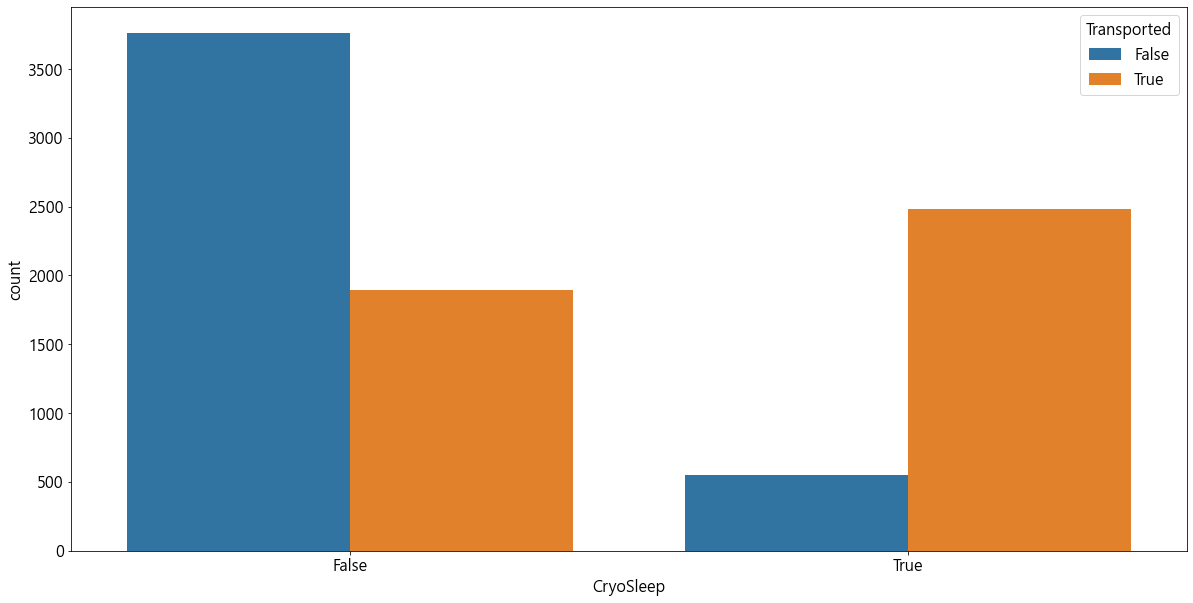

In [62]:
# 결과 데이터와 관계를 확인한다.
sns.countplot(data=total_df, x='CryoSleep', hue='Transported')
plt.show()

- CryoSleep 값이 False 인경우 도착하지 못할 확률이 매우 높다.
- True인 경우는 도착할 확률이 약간 높다.

### Cabin
- 객실정보
- deck/번호/위치
- deck와 cabinside 정보로 대체해서 사용한다.
- 이 컬럼은 제거한다.

In [63]:
total_df.drop('Cabin', axis=1, inplace=True)
total_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'Deck', 'CabinSide', 'Age2', 'RoomService2',
       'FoodCourt2', 'ShoppingMall2', 'Spa2', 'VRDeck2'],
      dtype='object')

### Deck
- Cabin 에서 추출한 데이터
- 객실 위치 정보

In [64]:
# 결측치 확인
total_df['Deck'].isna().sum()

299

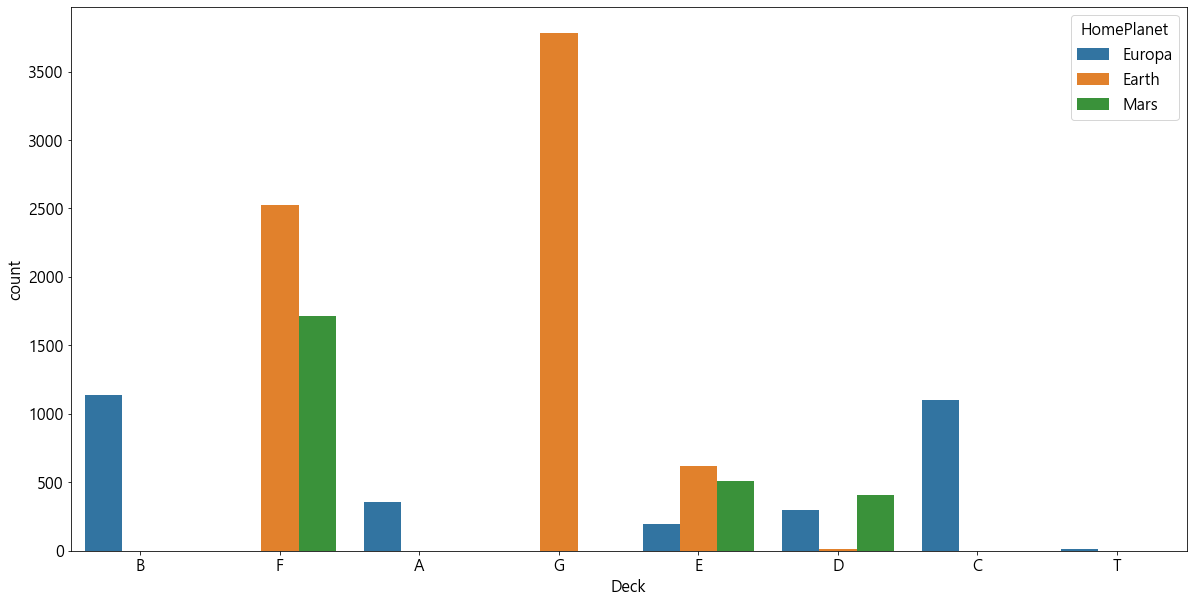

In [65]:
# Deck와 HomePlanet간의 관계
sns.countplot(data=total_df, x='Deck', hue='HomePlanet')
plt.show()

- B, A, C, T Deck는 Europa에만 있다.
- G Deck 는 Earth에만 있다.
- G Deck 는 Earth가 제일 많다
- F Deck 는 Mars에 제일 많다.

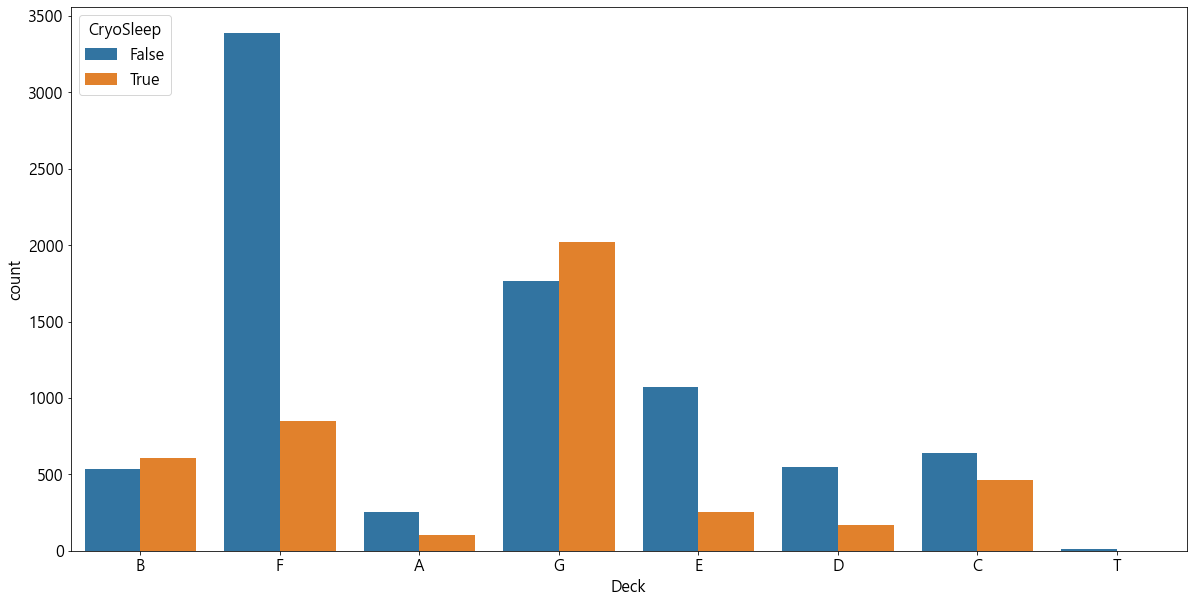

In [66]:
# Deck와 CryoSleep간의 관계
sns.countplot(data=total_df, x='Deck', hue='CryoSleep')
plt.show()

- F, E, D Deck의 경우 동면을 하지 않은 사람의 비율이 높다.

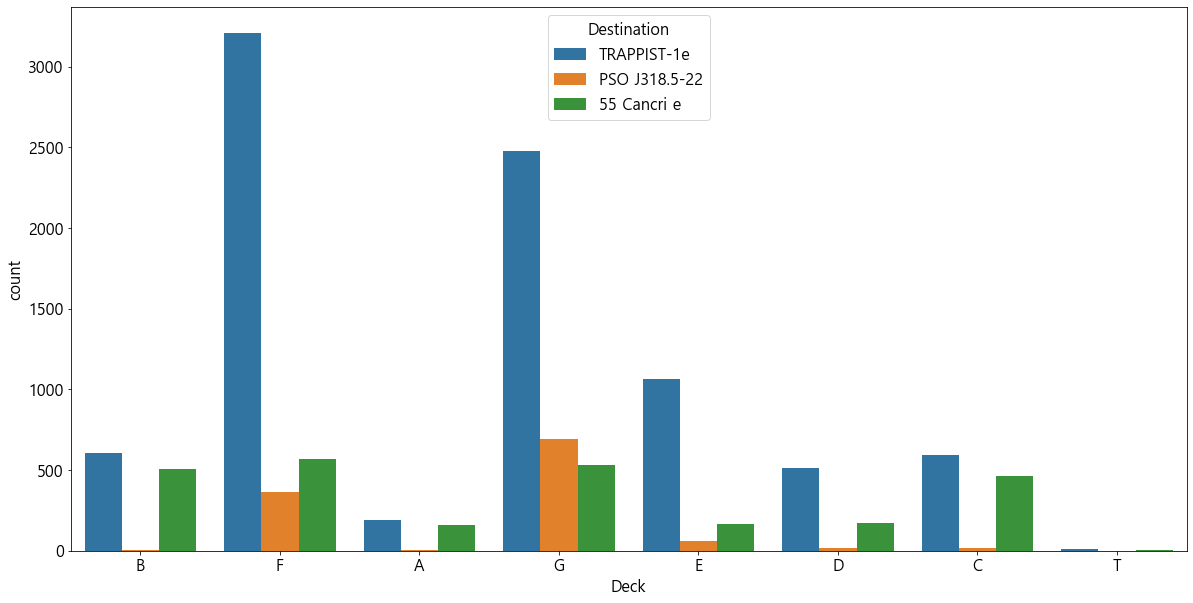

In [67]:
# Deck와 Destination간의 관계
sns.countplot(data=total_df, x='Deck', hue='Destination')
plt.show()

- PSO J318.5-22 행성에 도착하는 사람들은 F, G Deck에 대부분 존재한다.
- TRAPPIST-1e 행성에 도착하는 사람들은 F, G, E, D Deck의 비율이 높다.

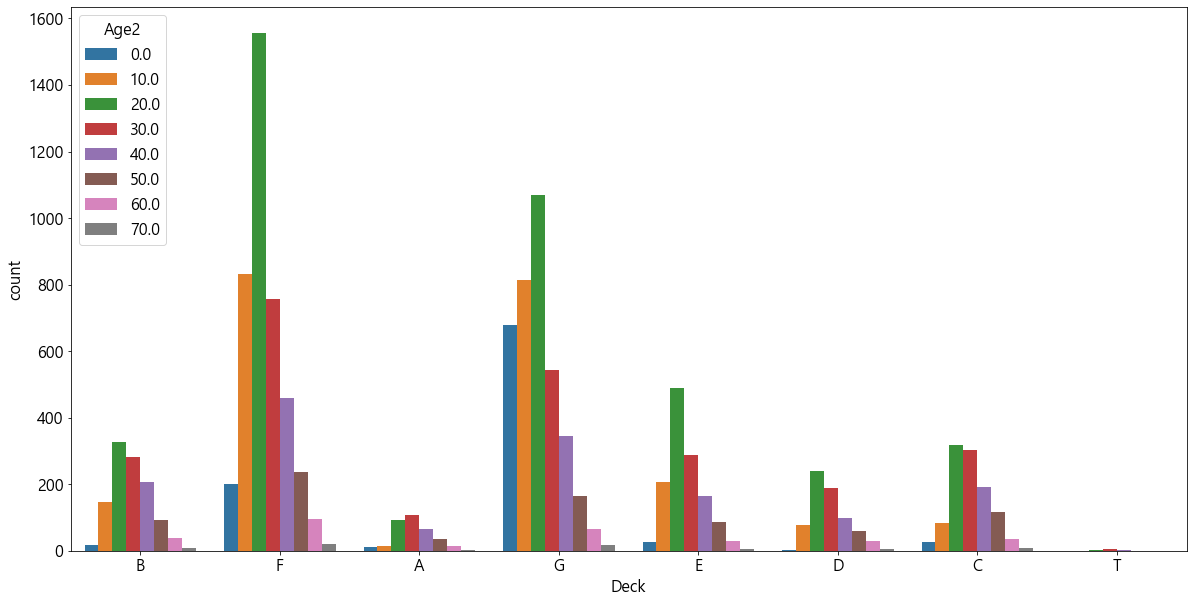

In [68]:
# Deck와 Age2간의 관계
sns.countplot(data=total_df, x='Deck', hue='Age2')
plt.show()

- F, G, E Deck는 다른 곳에 비해 20대 비율이 높다.
- G Deck는 다른 곳에 비해 0대 비율이 높다.

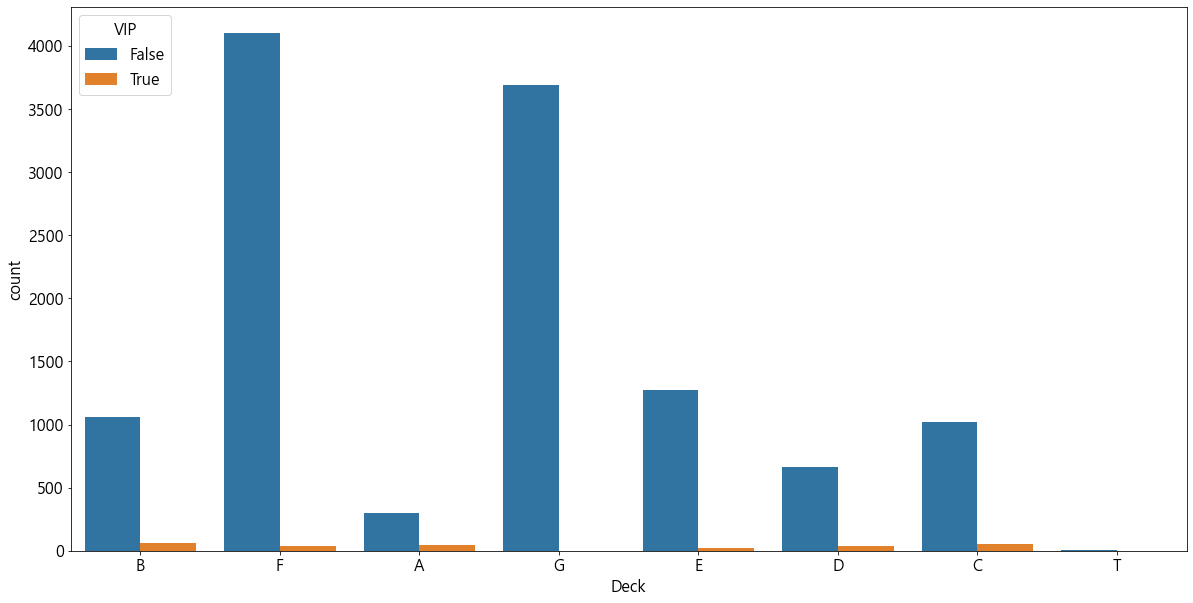

In [69]:
# Deck와 VIP간의 관계
sns.countplot(data=total_df, x='Deck', hue='VIP')
plt.show()

- G Deck를 제외한 모든 Deck에 VIP가 존재한다.
- VIP가 아닌 사람들은 다른 Deck에 비해서 F, G Deck에 많이 존재한다.

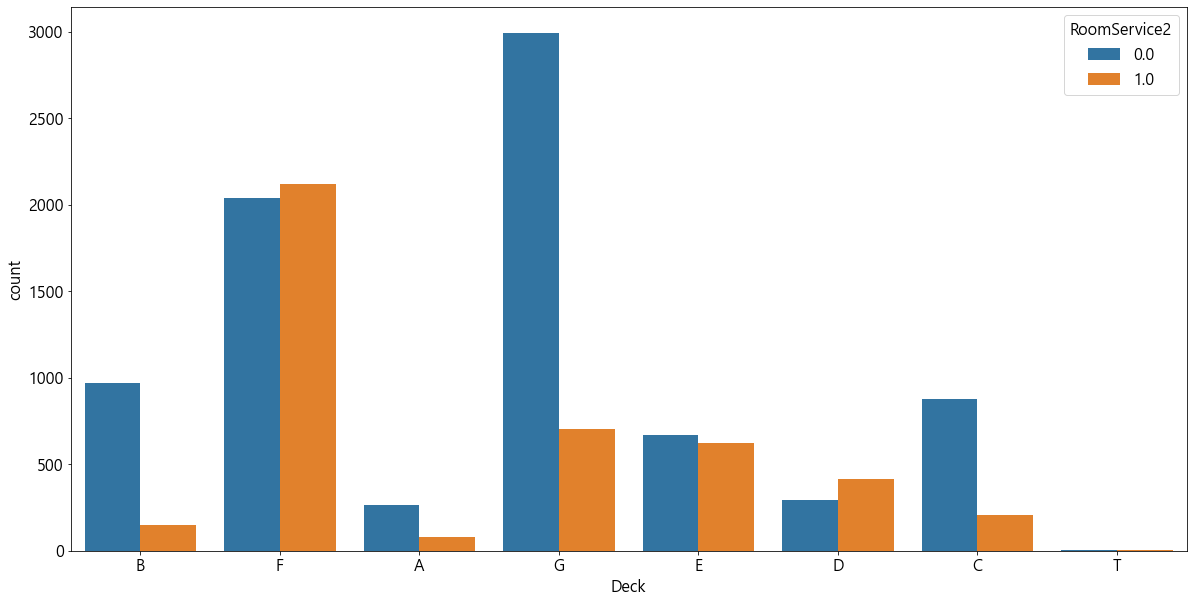

In [70]:
# Deck와 RoomService2간의 관계
sns.countplot(data=total_df, x='Deck', hue='RoomService2')
plt.show()

- B, A, G, C Deck는 룸서비스를 이용하지 않은 사람이 월등히 많다.
- F, E, D, T Deck는 서로간의 비율이 비슷하게 나타난다.

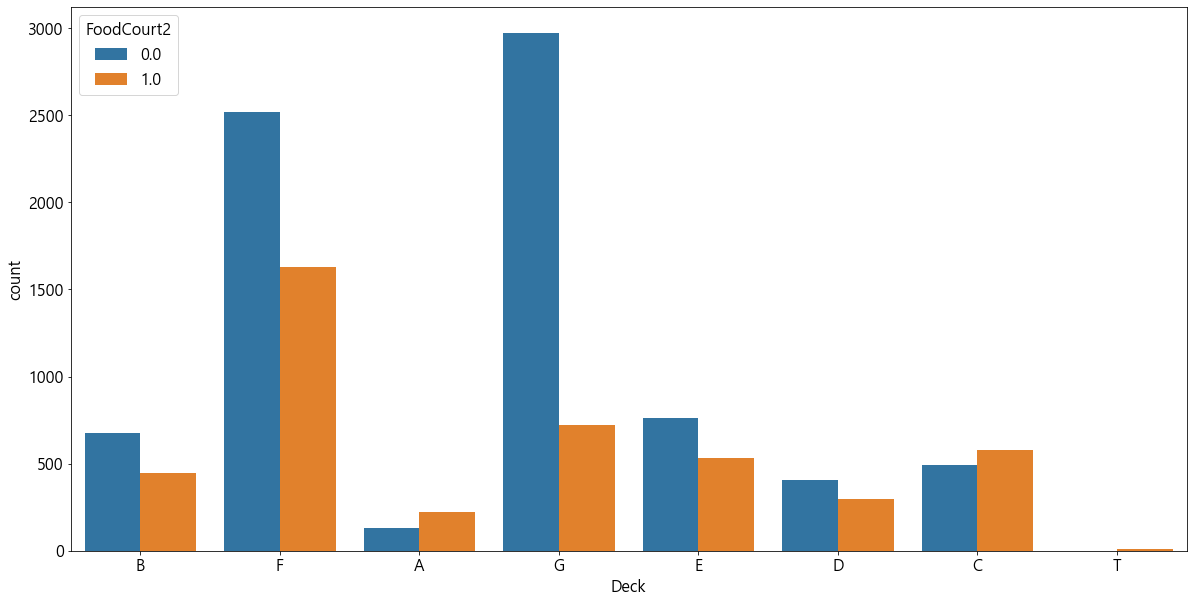

In [71]:
# Deck와 FoodCourt2간의 관계
sns.countplot(data=total_df, x='Deck', hue='FoodCourt2')
plt.show()

- F, G Deck는 푸트코트 이용 비율이 높은 편이다.

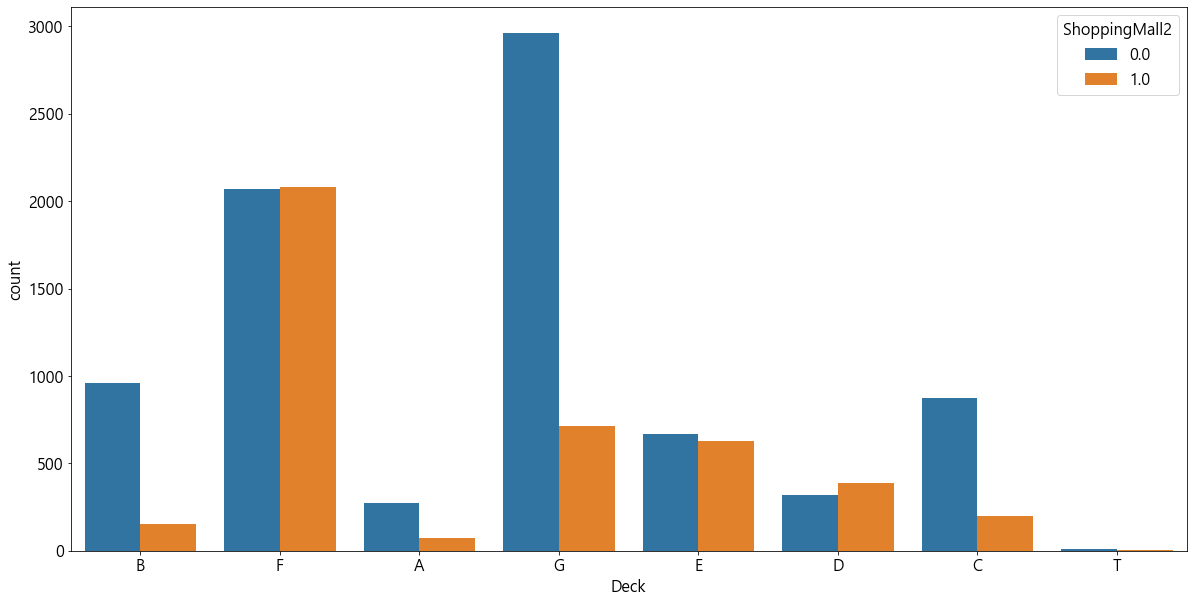

In [72]:
# Deck와 ShoppingMall2간의 관계
sns.countplot(data=total_df, x='Deck', hue='ShoppingMall2')
plt.show()

- B, A, G, C Deck는 쇼핑몰 이용 비율이 낮다.
- F, E, D, T Deck는 쇼핑몰 이용 비율이 비슷하다.

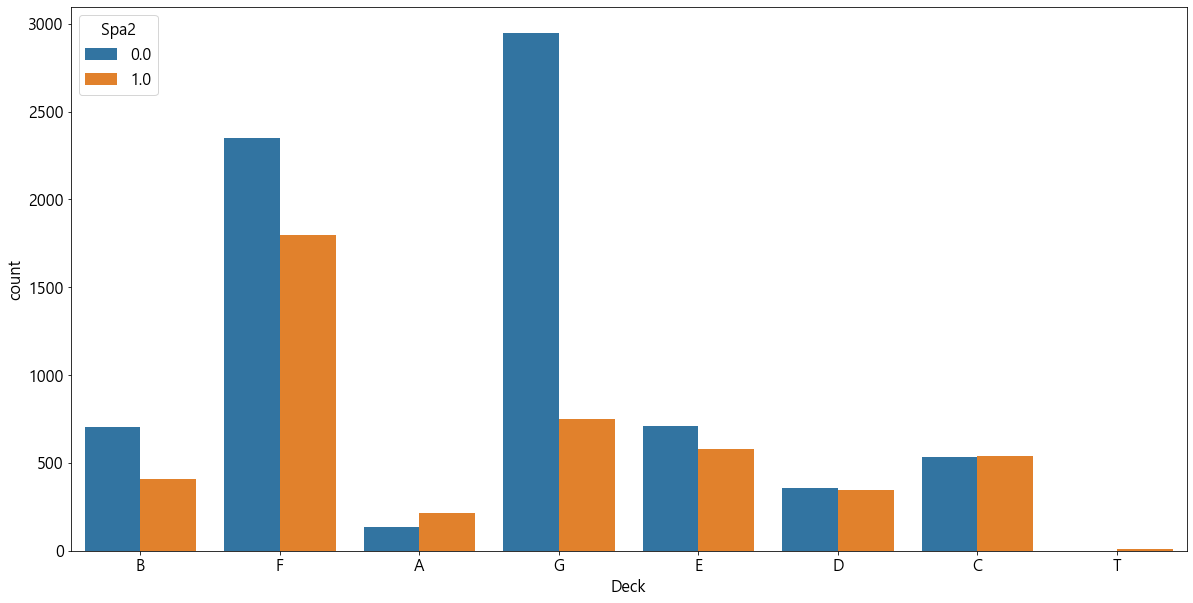

In [73]:
# Deck와 Spa2간의 관계
sns.countplot(data=total_df, x='Deck', hue='Spa2')
plt.show()

- G 데크의 경우 스파를 이용하지 않은 사람들이 월등히 많다.

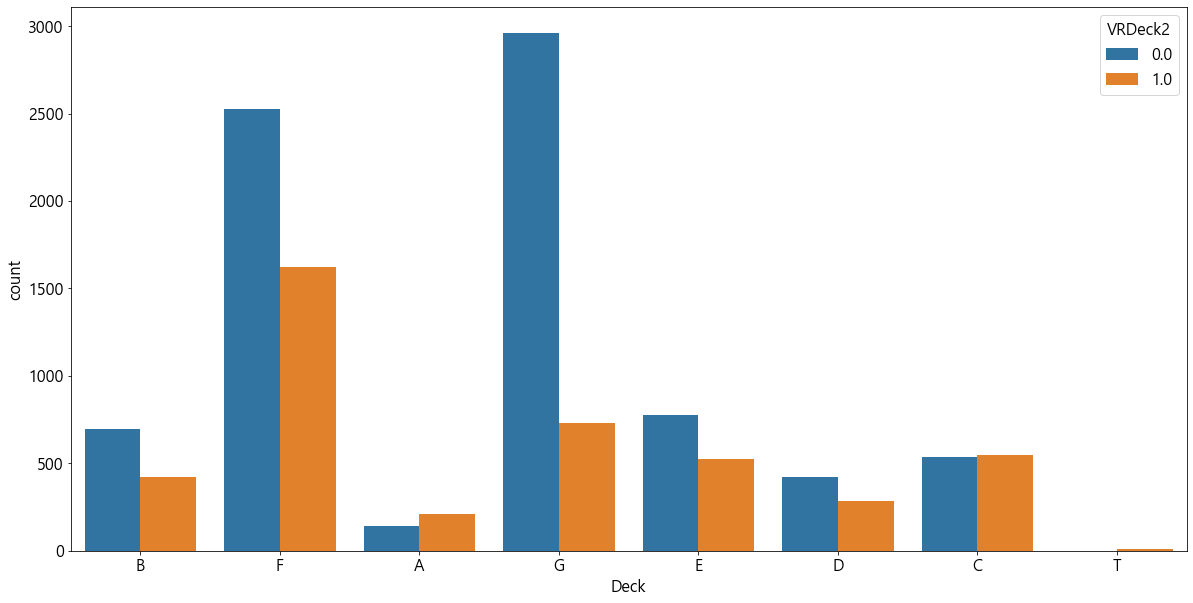

In [74]:
# Deck와 VRDeck2간의 관계
sns.countplot(data=total_df, x='Deck', hue='VRDeck2')
plt.show()

- G 데크인 경우 사용하지 않은 비율이 월등히 높다.

In [75]:
# HomePlanet이 Earth 인 사람들 모두를 G 로 채워준다.
# HomePlanet이 Earth인 사람들을 가져온다.
a1 = total_df.query('HomePlanet == "Earth"')
# 이 사람들에 대해 Deck가 결측치인 사람들을 가져온다.
a2 = a1[a1['Deck'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'Deck'] = 'G'

total_df['Deck'].isna().sum()

136

In [76]:
# HomePlanet이 Europa인 사람들의 수를 확인한다.
a1 = total_df.query('HomePlanet == "Europa"')
# 결측치인 사람들을 가져온다.
a2 = a1[a1['Deck'].isna()]
# 수를 확인한다.
len(a2)

79

In [77]:
# VIP가 아닌 사람들은 F로 채워준다(제일 많아서..)
# VIP가 아닌 사람들을 가져온다.
a1 = total_df.query('VIP == False')
# 이 사람들에 대해 Deck가 결측치인 사람들을 가져온다.
a2 = a1[a1['Deck'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'Deck'] = 'F'

total_df['Deck'].isna().sum()

12

In [78]:
# 나머지는 G Deck로 채워준다(F와 더불어 많아서...)
# 이 사람들에 대해 Deck가 결측치인 사람들을 가져온다.
a2 = total_df[total_df['Deck'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'Deck'] = 'G'

total_df['Deck'].isna().sum()

0

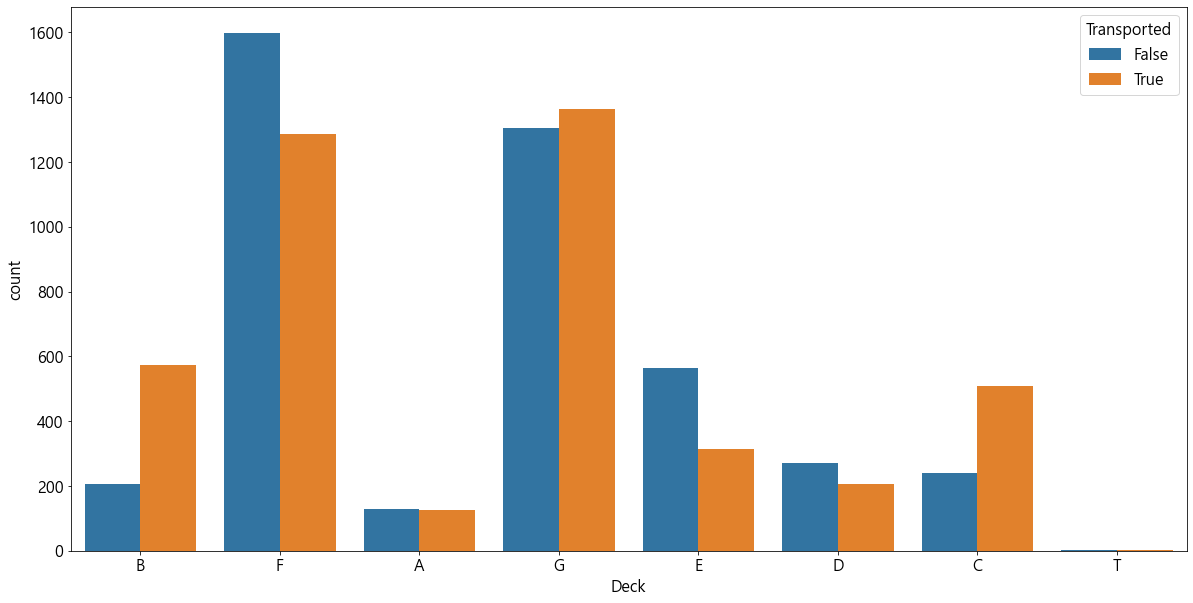

In [79]:
# Deck와 결과간의 관계
sns.countplot(data=total_df, x='Deck', hue='Transported')
plt.show()

- B, C 데크는 도착할 확률이 높다.
- F, E 데크는 도착하지 못할 확률이 높다.
- 다른 데크는 비슷하다.
- B, C, F, E 데크 조차도 차이가 많이 나지 않는 편이다.
- 만약 결과가 나쁘다면 제거할 컬럼이 된다

### CabinSide
- Cabin에서 추출한 데이터
- 좌석의 창가 옆 여부

In [80]:
total_df['CabinSide'].isna().sum()

299

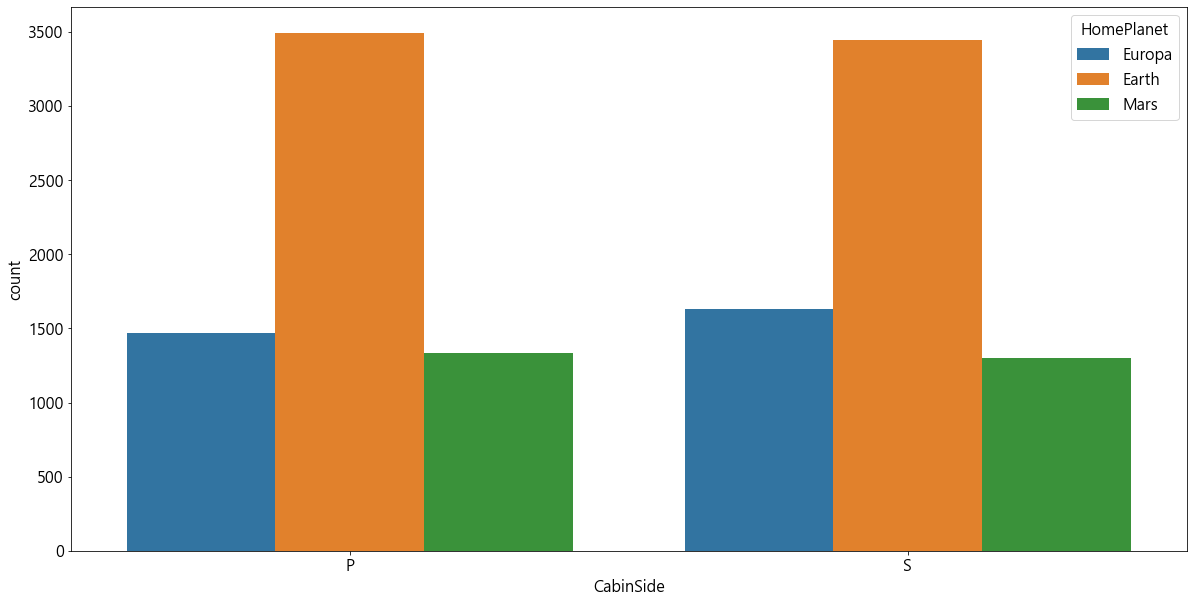

In [81]:
# CabinSide와 HomePlanet 간의 관계
sns.countplot(data=total_df, x='CabinSide', hue='HomePlanet')
plt.show()

- 비슷합니다.

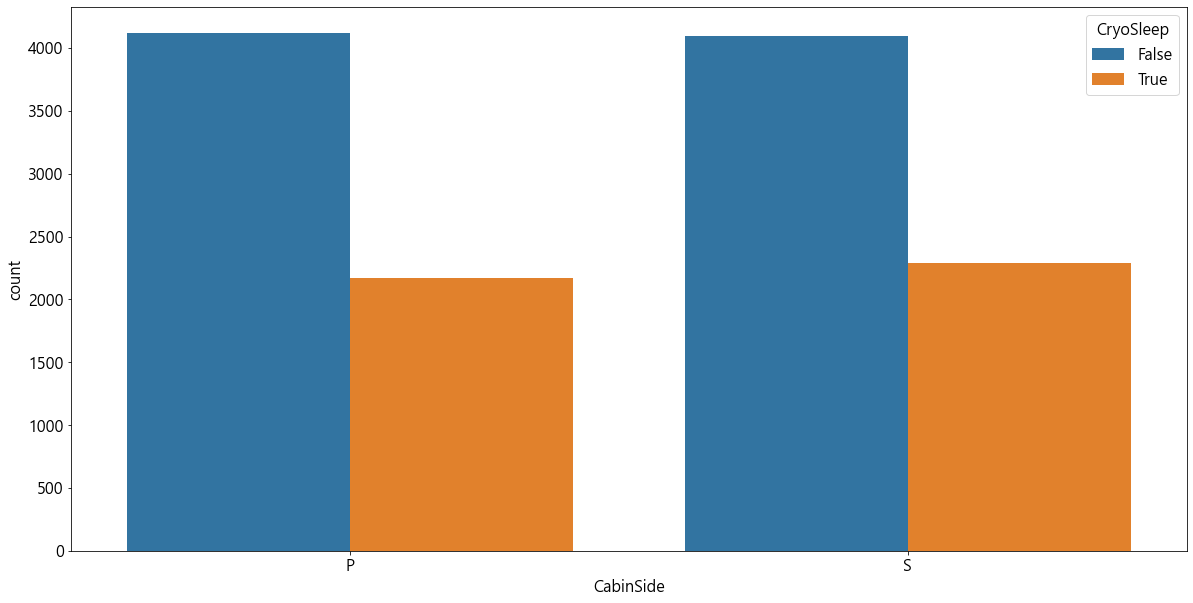

In [82]:
# CabinSide와 CryoSleep 간의 관계
sns.countplot(data=total_df, x='CabinSide', hue='CryoSleep')
plt.show()

- 비슷하다. ㅠ

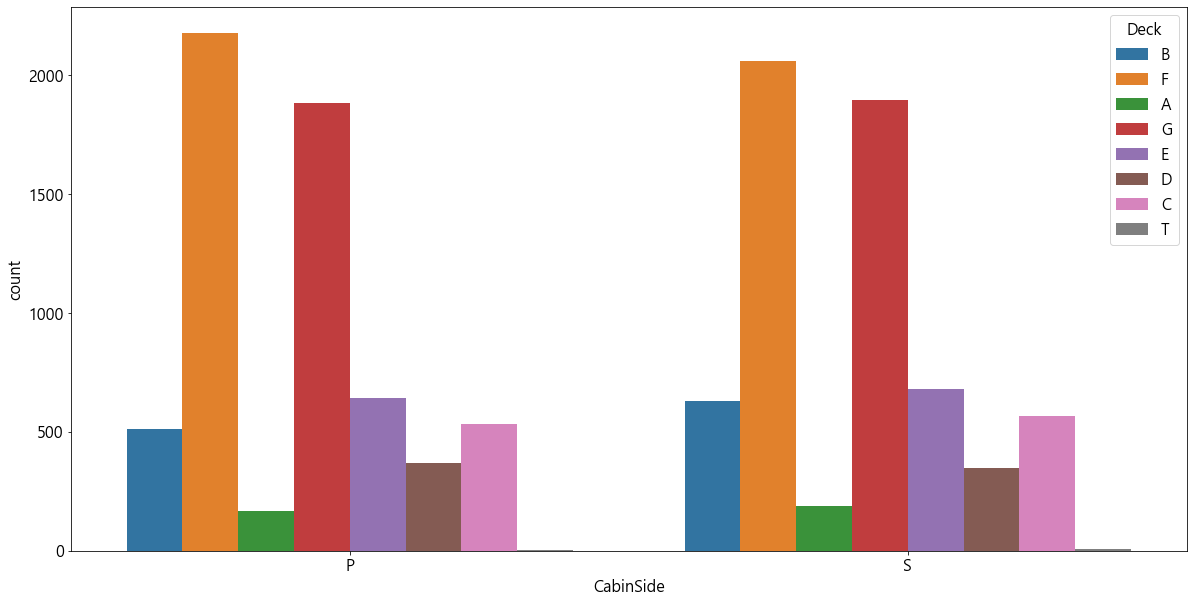

In [83]:
# CabinSide와 Deck 간의 관계
sns.countplot(data=total_df, x='CabinSide', hue='Deck')
plt.show()

- 비슷하다. ㅠㅠ

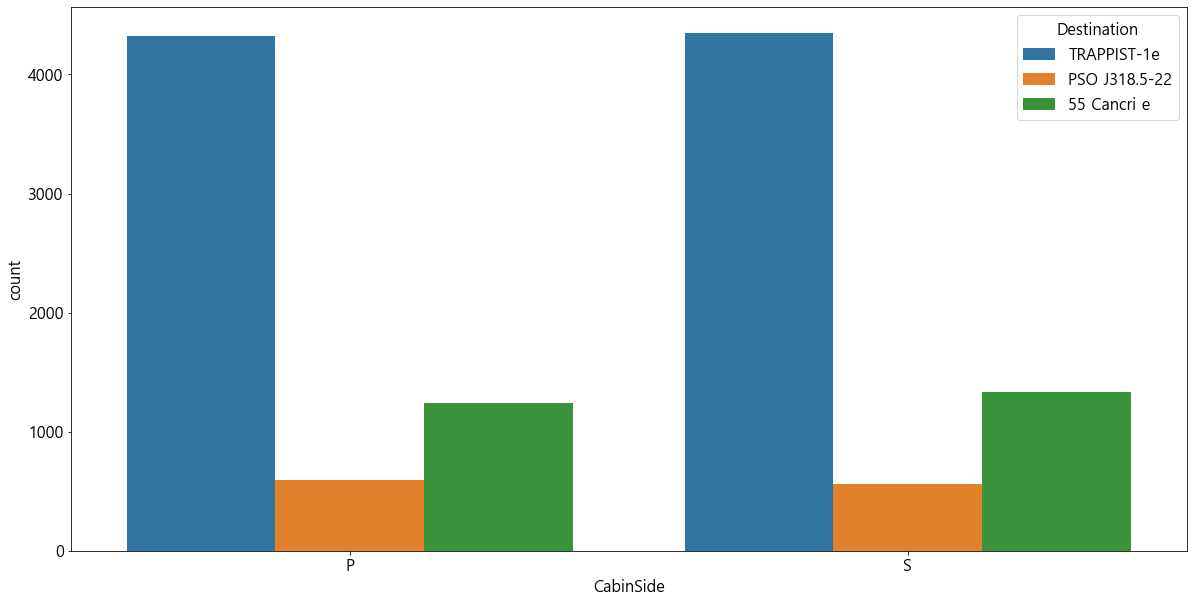

In [84]:
# CabinSide와 Destination 간의 관계
sns.countplot(data=total_df, x='CabinSide', hue='Destination')
plt.show()

- 비슷하다. ㅠㅠㅠ

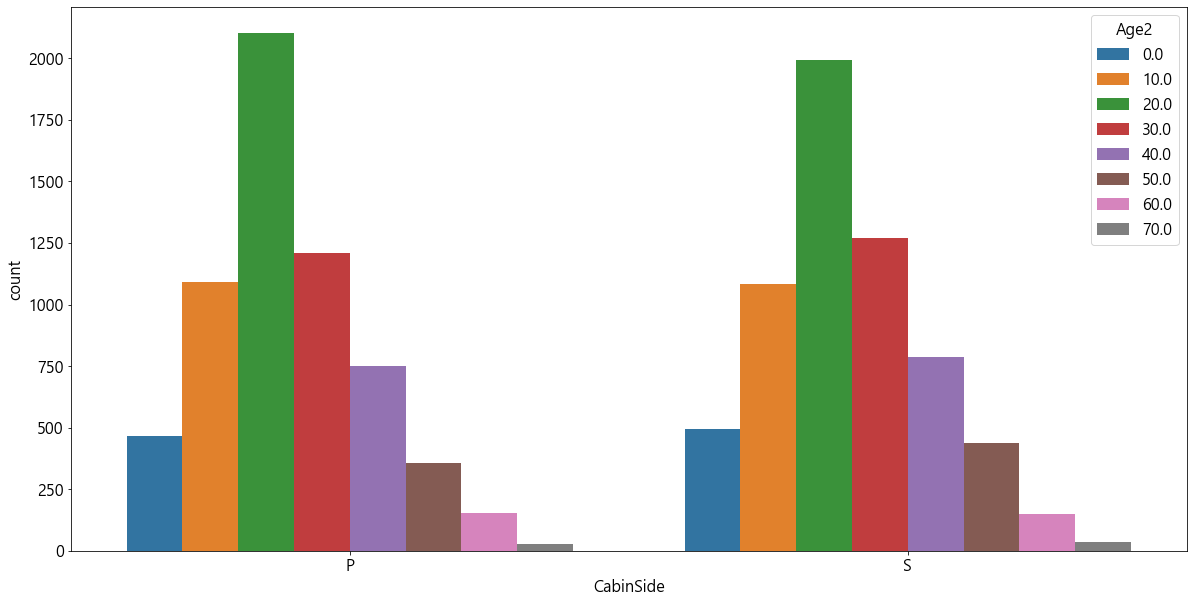

In [85]:
# CabinSide와 Age2 간의 관계
sns.countplot(data=total_df, x='CabinSide', hue='Age2')
plt.show()

- 비슷하다. ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ

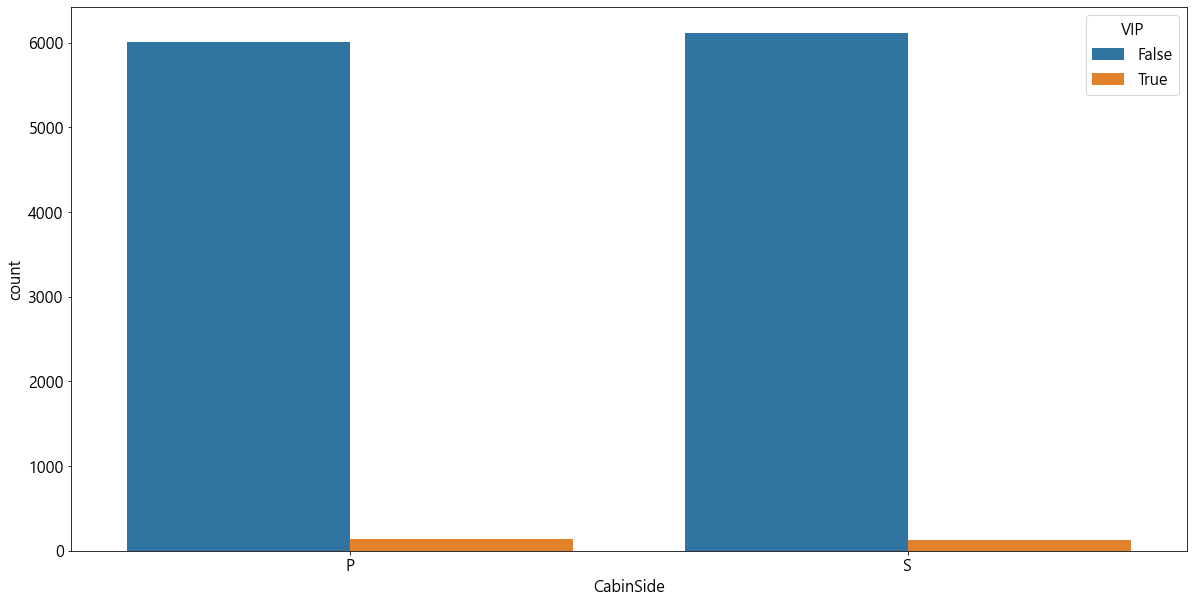

In [86]:
# CabinSide와 VIP 간의 관계
sns.countplot(data=total_df, x='CabinSide', hue='VIP')
plt.show()

- 비슷하다. 하하하하하하하하하...

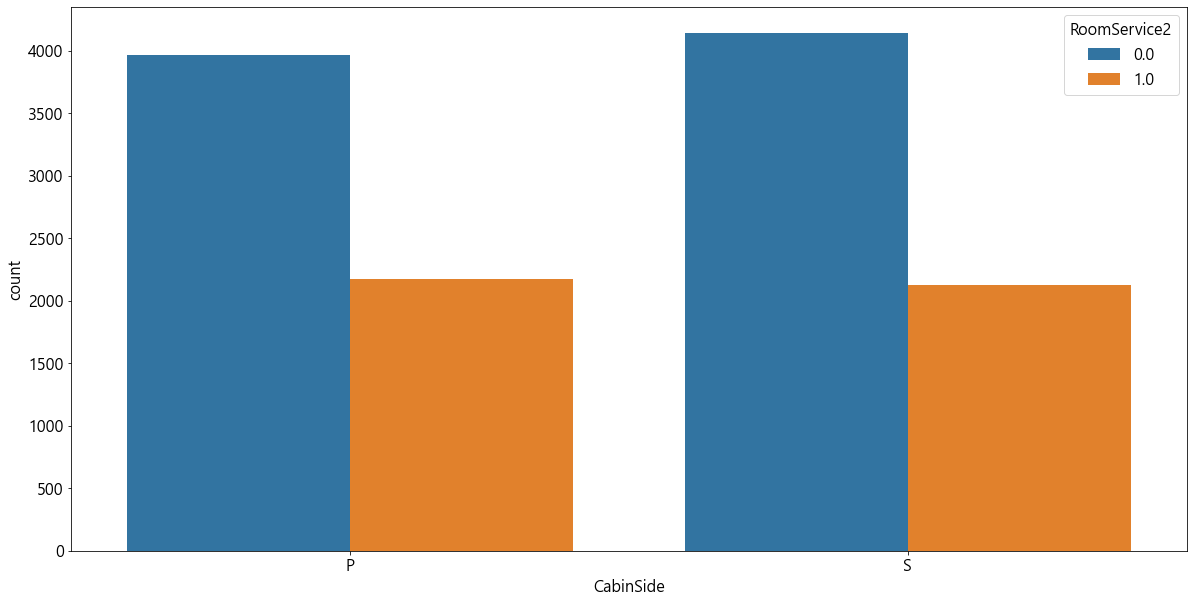

In [87]:
# CabinSide와 RoomService2 간의 관계
sns.countplot(data=total_df, x='CabinSide', hue='RoomService2')
plt.show()

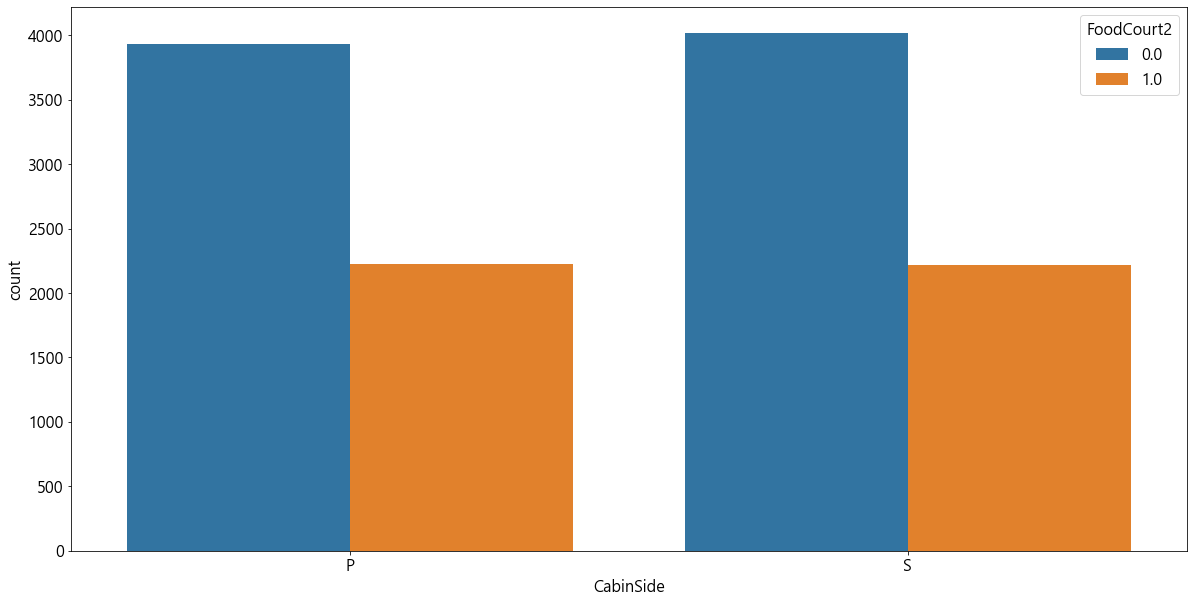

In [88]:
# CabinSide와 FoodCourt2 간의 관계
sns.countplot(data=total_df, x='CabinSide', hue='FoodCourt2')
plt.show()

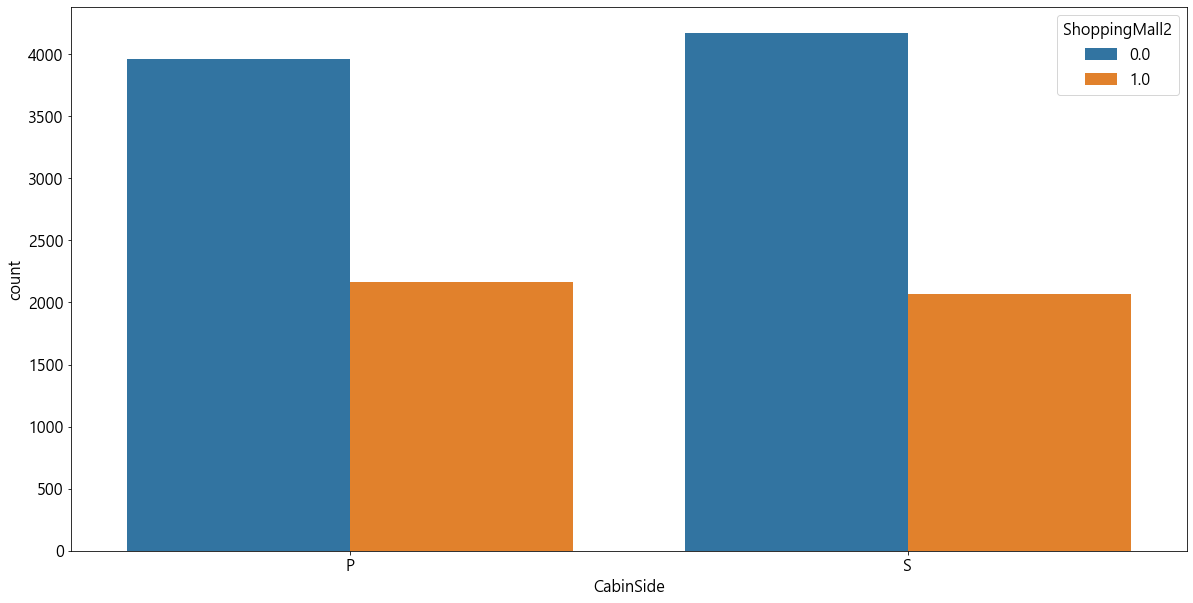

In [89]:
# CabinSide와 ShoppingMall2 간의 관계
sns.countplot(data=total_df, x='CabinSide', hue='ShoppingMall2')
plt.show()

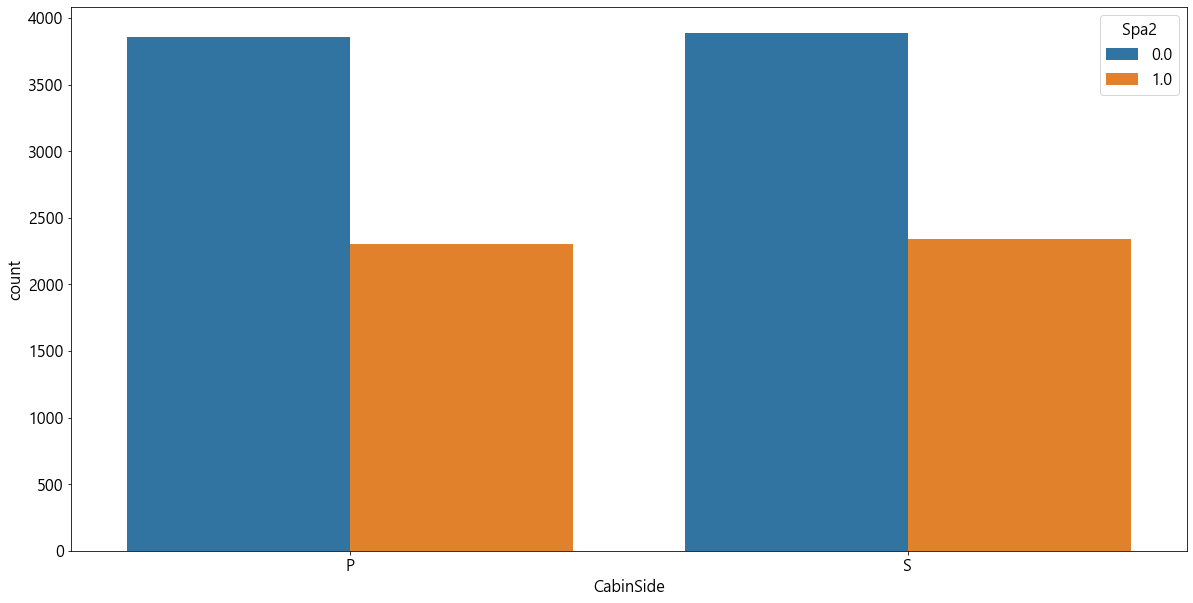

In [90]:
# CabinSide와 Spa2 간의 관계
sns.countplot(data=total_df, x='CabinSide', hue='Spa2')
plt.show()

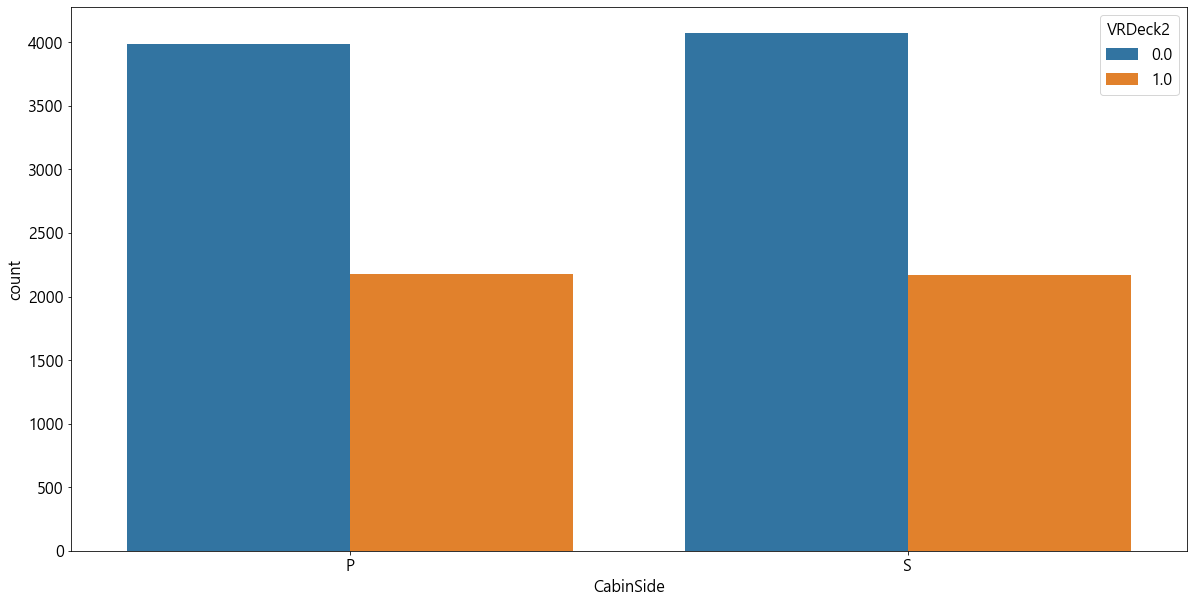

In [91]:
# CabinSide와 VRDeck2 간의 관계
sns.countplot(data=total_df, x='CabinSide', hue='VRDeck2')
plt.show()

- 모든컬럼의 데이터가 비율이 똑같다.

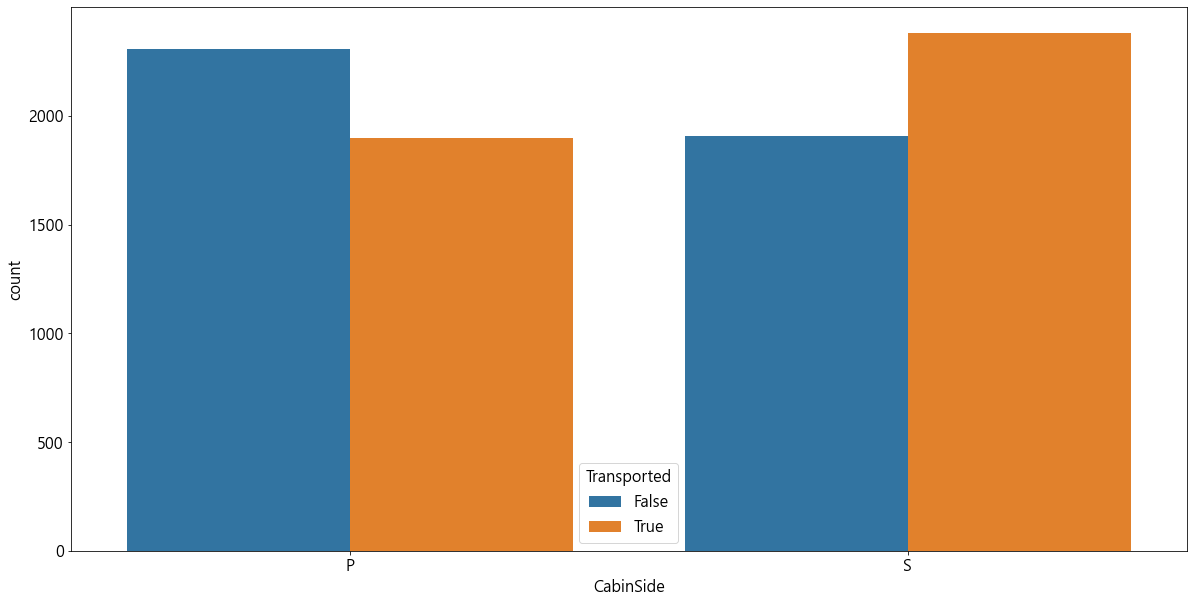

In [93]:
# CabinSide와 Transported 간의 관계
sns.countplot(data=total_df, x='CabinSide', hue='Transported')
plt.show()

In [96]:
# 가상의 CabinSide를 만들어 채워주겠다.
a1 = total_df[total_df['CabinSide'].isna()]
total_df.loc[a1.index, 'CabinSide'] = 'M'
total_df['CabinSide'].isna().sum()

0